# Comparison between cluster of cases and PRS division (deciles and quartiles)


In [1]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(ggrepel)
library(clustAnalytics)
library(rlist)
library(ggsci)
library(stringr)
library(corrplot)
library(RColorBrewer)
library(VennDiagram)
library(ggpubr)
library(reshape2)


options(bitmapType = 'cairo', device = 'png')

fold_notebook <- '/psycl/g/mpsziller/lucia/castom_cad_scz/jupyter_notebook/'
outFold <- sprintf('%sCAD_clustering/', fold_notebook)
colorFile <- sprintf('%scolor_pheno_type_UKBB.txt', fold_notebook)

setwd('/psycl/g/mpsziller/lucia/CAD_UKBB/eQTL_PROJECT')
fold_tissue <- "OUTPUT_GTEx/predict_CAD/Liver/200kb/CAD_GWAS_bin5e-2/UKBB/devgeno0.01_testdevgeno0/CAD_HARD_clustering/update_corrPCs/"
out_tissue <- get(load(sprintf('%s/tscore_corrPCs_zscaled_clusterCases_PGmethod_HKmetric.RData', fold_tissue)))
gene_tissue <- get(load(sprintf('%s/tscoreOriginal_corrPCs_tscoreClusterCases_featAssociation.RData', fold_tissue)))
path_tissue <- get(load(sprintf('%s/pathOriginal_filtJS0.2_corrPCs_tscoreClusterCases_featAssociation.RData', fold_tissue)))
endop_tissue <- read_tsv(sprintf('%s/filter_endopheno/tscore_corrPCs_zscaled_clusterCases_PGmethod_HKmetric_phenoAssociation_GLM_combined_keepPhenoClass.txt', fold_tissue), show_col_types = FALSE)
endop_variance_tissue_wm <- read_tsv(sprintf('%s/rescaleCont_withMedication_tscore_corrPCs_zscaled_clusterCases_group_phenotype_R2.txt', fold_tissue), show_col_types = FALSE)
endop_variance_tissue_wom <- read_tsv(sprintf('%s/rescaleCont_withoutMedication_tscore_corrPCs_zscaled_clusterCases_group_phenotype_R2.txt', fold_tissue), show_col_types = FALSE)

fold_PRS <- "OUTPUT_GWAS/PRS"
# get PRS
PRS_res <- read.table(sprintf("%s/PRS_CAD_UKBB.best", fold_PRS), h=T, stringsAsFactors = F)
PRS_res$PRS_scaled <- scale(PRS_res$PRS)[,1]
PRS_res$Individual_ID <- paste0("X", PRS_res$FID)

out_PRSdec <- get(load(sprintf('%s/PRS_CAD_UKBB_Cases_deciles.RData', fold_PRS)))
gene_PRSdec <- get(load(sprintf('%s/tscoreOriginal_corrPCs_PRS_decilesClusterCases_featAssociation.RData', fold_PRS)))
path_PRSdec <- get(load(sprintf('%s/pathOriginal_filtJS0.2_corrPCs_PRS_decilesClusterCases_featAssociation.RData', fold_PRS)))
endop_PRSdec <- read_tsv(sprintf('%s/filter_endopheno/PRS_deciles_clusterCases_PGmethod_HKmetric_phenoAssociation_GLM_combined_keepPhenoClass.txt', fold_PRS), show_col_types = FALSE)
endop_variance_PRSdec_wm <- read_tsv(sprintf('%s/rescaleCont_withMedication_PRS_deciles_clusterCases_group_phenotype_R2.txt', fold_PRS), show_col_types = FALSE)
endop_variance_PRSdec_wom <- read_tsv(sprintf('%s/rescaleCont_withoutMedication_PRS_deciles_clusterCases_group_phenotype_R2.txt', fold_PRS), show_col_types = FALSE)

out_PRSqua <- get(load(sprintf('%s/PRS_CAD_UKBB_Cases_quantiles.RData', fold_PRS)))
gene_PRSqua <- get(load(sprintf('%s/tscoreOriginal_corrPCs_PRS_quantilesClusterCases_featAssociation.RData', fold_PRS)))
path_PRSqua <- get(load(sprintf('%s/pathOriginal_filtJS0.2_corrPCs_PRS_quantilesClusterCases_featAssociation.RData', fold_PRS)))
endop_PRSqua <- read_tsv(sprintf('%s/filter_endopheno/PRS_quantiles_clusterCases_PGmethod_HKmetric_phenoAssociation_GLM_combined_keepPhenoClass.txt', fold_PRS), show_col_types = FALSE)
endop_variance_PRSqua_wm <- read_tsv(sprintf('%s/rescaleCont_withMedication_PRS_quantiles_clusterCases_group_phenotype_R2.txt', fold_PRS), show_col_types = FALSE)
endop_variance_PRSqua_wom <- read_tsv(sprintf('%s/rescaleCont_withoutMedication_PRS_quantiles_clusterCases_group_phenotype_R2.txt', fold_PRS), show_col_types = FALSE)

# note: deciles nomebnclature here does not mean anything, only used PRS and not partition!
endop_variance_PRS_wm <- read_tsv(sprintf('%s/rescaleCont_withMedication_PRS_deciles_clusterCases_PRS_phenotype_R2.txt', fold_PRS), show_col_types = FALSE)
endop_variance_PRS_wom <- read_tsv(sprintf('%s/rescaleCont_withoutMedication_PRS_deciles_clusterCases_PRS_phenotype_R2.txt', fold_PRS), show_col_types = FALSE)

endop_variance_PRS <- rbind(endop_variance_PRS_wm, endop_variance_PRS_wom) %>%
    dplyr::mutate(Fpval_corr = p.adjust(Fpval_group, method = "BH"))
endop_variance_PRSqua <- rbind(endop_variance_PRSqua_wm, endop_variance_PRSqua_wom) %>%
    dplyr::mutate(Fpval_corr = p.adjust(Fpval_group, method = "BH"))
endop_variance_PRSdec <- rbind(endop_variance_PRSdec_wm, endop_variance_PRSdec_wom) %>%
    dplyr::mutate(Fpval_corr = p.adjust(Fpval_group, method = "BH"))
endop_variance_tissue <- rbind(endop_variance_tissue_wm, endop_variance_tissue_wom) %>%
    dplyr::mutate(Fpval_corr = p.adjust(Fpval_group, method = "BH"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.5
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘clustAnalytics’


The following object is masked from ‘package:ggp

In [47]:
# plot PRS distribution
plot_PRS_dist_PRS_partition <- function(cl_PRS, PRS_res, outFold, PRS_name, width_pl = 3.5, height_pl = 3.5){

    PRS_cases <- cl_PRS$cl_best
    PRS_cases$PRS_scaled <- PRS_res$PRS_scaled[match(PRS_cases$id, PRS_res$Individual_ID)]
    gr_id <- sort(unique(PRS_cases$gr))
    PRS_cases$gr <- paste0("gr", PRS_cases$gr)
    PRS_cases$gr <- factor(PRS_cases$gr, levels = paste0("gr", gr_id))

    color_gr <- pal_d3(palette = 'category20')(length(unique(PRS_cases$gr)))

    pl_cases <- ggplot(data = PRS_cases, aes(x = gr, y = PRS_scaled, fill = gr)) + 
        geom_violin(alpha = 0.8)+
        geom_boxplot(width=0.2, fill="white")+
        theme_bw() + 
        theme(legend.position = "none", axis.text = element_text(size = 12)) +
        xlab("") + 
        ylab("CAD PRS among CAD cases") + 
        scale_fill_manual(values = color_gr)
    print(pl_cases)

    ggsave(filename = sprintf('%sPRS_dist_%s.pdf', outFold, gsub(" ", "_", PRS_name)), 
         width = width_pl, height = height_pl, plot = pl_cases, device = 'pdf')
}

# variance explained for tissue significant results
plot_variance_explained_comparision <- function(
    res_tissue,
    res_PRS,
    var_name = "R2_group", 
    res_variance_tissue, 
    res_variance_PRS, 
    tissue_name, 
    PRS_name, 
    pval_corr_thr = 0.05,
    pvalue_thr = 0.05){
      
pheno_id <- unique(res_tissue$pheno_id[res_tissue$pvalue <= pvalue_thr])
length(pheno_id)
# consider only pheno_id restricted class
res_variance_tissue <- res_variance_tissue %>% filter(pheno_id %in% res_tissue$pheno_id) 
res_variance_PRS <- res_variance_PRS %>% filter(pheno_id %in% res_tissue$pheno_id)

df <- data.frame(
  pheno_id = res_variance_tissue$pheno_id,
  tissue_val = res_variance_tissue[, var_name, drop = T], 
  PRS_val = res_variance_PRS[, var_name, drop = T], 
  groupspec_tissue_FDR = res_variance_tissue$pheno_id %in% res_tissue$pheno_id[res_tissue$pval_corr <= pval_corr_thr], 
  groupspec_PRS_FDR = res_variance_PRS$pheno_id %in% res_PRS$pheno_id[res_PRS$pval_corr <= pval_corr_thr], 
  groupspec_tissue_nom = res_variance_tissue$pheno_id %in% res_tissue$pheno_id[res_tissue$pvalue <= pvalue_thr], 
  groupspec_PRS_nom = res_variance_PRS$pheno_id %in% res_PRS$pheno_id[res_PRS$pvalue <= pvalue_thr]) %>%
    dplyr::mutate(type = case_when(groupspec_tissue_FDR ~ paste0(tissue_name, " FDR ", pval_corr_thr),
                  groupspec_tissue_nom ~ paste0(tissue_name, " nominal ", pvalue_thr),
                  TRUE ~ paste0(tissue_name, "n.s."))) 
                  
res_variance_tissue$Field[res_variance_tissue$Field == "Medication for cholesterol, blood pressure or diabetes"] <- "Med. for chol., bp and diabetes (male)"
res_variance_tissue$Field[res_variance_tissue$Field == "Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones"] <- "Med. for chol., bp and diabetes (female)"
df$pheno_name <- res_variance_tissue$Field
df$pheno_name[!is.na(res_variance_tissue$Coding_meaning)] <- paste0(
    res_variance_tissue$Field[!is.na(res_variance_tissue$Coding_meaning)], 
    "\n", 
    res_variance_tissue$Coding_meaning[!is.na(res_variance_tissue$Coding_meaning)])
df <- df %>% arrange(desc(type))
df$label_pl <- NA
subset_df <- subset(df, type != paste0(tissue_name, "n.s."))
id <- subset_df$pheno_id[order(subset_df$tissue_val, decreasing = T)[1:10]]
df$label_pl[match(id, df$pheno_id)] <- df$pheno_name[match(id, df$pheno_id)]
print(df$label_pl[match(id, df$pheno_id)])


# df <- df %>% dplyr::mutate(label = case_when(type == "both" ~ pheno_name, TRUE ~ ''))
max_val <- max(c(df$tissue_val[df$type != paste0(tissue_name, "n.s.")], df$PRS_val[df$type != paste0(tissue_name, "n.s.")]),  na.rm = T)
pl <- ggplot(data = subset(df, type != paste0(tissue_name, "n.s.")), 
    aes(x = PRS_val, y = tissue_val, color = type, label = label_pl))+
    geom_point(alpha = 0.5) +
    geom_abline(intercept = 0, slope = 1, color = 'black', linetype = 'dashed') +
    geom_text_repel(min.segment.length = 0, force = 50, max.overlaps = 10, size = 2.5) +
    theme_bw() +
    theme(legend.position = 'bottom') +
    xlim(0, max_val) +
    ylim(0, max_val) +
    scale_color_manual(values = c("blue", "grey50")) +
    xlab(paste0("From ", PRS_name)) +
    ylab(paste0("From ", tissue_name, " clusters")) +
    ggtitle(ifelse(grepl("R2", var_name), "R2", "Fstat")) +
    # change legend title
    labs(color = 'Group-specific endopheno.')

print(pl)
perc_FDR <- sum(df$tissue_val[df$type == paste0(tissue_name, " FDR ", pval_corr_thr)] > df$PRS_val[df$type == paste0(tissue_name, " FDR ", pval_corr_thr)]) / 
    sum(df$type == paste0(tissue_name, " FDR ", pval_corr_thr))
print(perc_FDR)
print(sum(df$type == paste0(tissue_name, " FDR ", pval_corr_thr)))

perc_nom <- sum(df$tissue_val[df$type != paste0(tissue_name, "n.s.")] > df$PRS_val[df$type != paste0(tissue_name, "n.s.")]) / 
    sum(df$type != paste0(tissue_name, "n.s."))
print(perc_nom)
print(sum(df$type != paste0(tissue_name, "n.s.")))

# replace blank characters with _ in PRS_name
ggsave(filename = sprintf('%sexplained_variance_%s_%s_vs_%s_clusters.pdf', outFold, var_name, gsub(" ", "_", PRS_name), tissue_name), 
         width = 3.5, height = 3.7, plot = pl, device = 'pdf')

    return(df)
}


# NMI between liver and PRS partition, plot overlap cluster
plot_overlap_clusters <- function(cl_PRS, cl_tissue, tissue_name, PRS_name, width_pl = 6, height_pl = 6, outFold){
    
    NMI_res <- compare(cl_PRS$cl_best$gr, cl_tissue$cl_best$gr, method = "NMI")
    chisq_pvalue <- chisq.test(table(cl_PRS$cl_best$gr, cl_tissue$cl_best$gr))$p.value
    
    # get enrichment
    tab_ov <- table(cl_PRS$cl_best$gr, cl_tissue$cl_best$gr)
    row_s <- rowSums(tab_ov)
    col_s <- colSums(tab_ov)
    exp_ov <- (row_s %o% col_s)/sum(tab_ov)
    tmp <- as.data.frame((tab_ov - exp_ov)/exp_ov)
    tmp <- dcast(tmp, Var1 ~ Var2, value.var = "Freq")
    tmp <- tmp %>% select(-Var1)
    colnames(tmp) <- paste0(tissue_name,' gr', colnames(tmp))
    rownames(tmp) <- paste0('PRS ', PRS_name ,rownames(tmp))
    tmp <- as.matrix(tmp)


    pdf(file = sprintf('%senrichment_PRS%s_vs_%s_clusters.pdf', outFold, PRS_name, tissue_name), 
    width = width_pl, height = height_pl, compress = F, pointsize = 12)

   corrplot(tmp, 
        method = 'square',
        tl.col = "black", # text color
         tl.cex=1.2,
         tl.srt=45, 
         cl.align.text='c',
         addCoef.col = "black",
         na.label = 'square', 
         na.label.col = 'darkgrey', 
         is.corr = F, 
         number.cex=0.9, 
         mar = c(0,7,7,0))
    dev.off()

    corrplot(tmp, 
        method = 'square',
        tl.col = "black", # text color
         tl.cex=1.2,
         tl.srt=45, 
         cl.align.text='c',
         addCoef.col = "black",
         na.label = 'square', 
         na.label.col = 'darkgrey', 
         is.corr = F, 
         number.cex=0.9, 
         mar = c(0,7,7,0))

    return(list(NMI = NMI_res, chisq_pvalue = chisq_pvalue, chisq_enrich = tmp))

}

# plot number of associations
plot_nsign_features <- function(res_tissue, res_PRS, tissue_name, PRS_name, type_data, width_pl, height_pl, outFold){

  
  # count number of cluster-specific genes and pathways
  tot_tissue <- do.call(rbind, res_tissue$test_feat)
  tot_PRS <- do.call(rbind, res_PRS$test_feat)

  tot_tissue_sign <- tot_tissue %>% 
    filter(pval_corr <= 0.01) %>%
    mutate(comp = factor(comp))

  tot_PRS_sign <- tot_PRS %>% 
  filter(pval_corr <= 0.01) %>%
  mutate(comp = factor(comp))

  count_tissue <- tot_tissue_sign %>% 
  group_by(comp) %>% 
  distinct(feat, .keep_all = TRUE) %>%
  summarise(n = n())
  n_unique_tissue <- length(unique(tot_tissue_sign$feat))

  count_PRS <- tot_PRS_sign %>% 
  group_by(comp, .drop = FALSE) %>% 
  distinct(feat, .keep_all = TRUE) %>%
  summarise(n = n())
  tot_gr_PRS <- tot_PRS$comp %>% unique()
  if(nrow(count_PRS) < length(tot_gr_PRS)){
  count_PRS <- count_PRS %>% 
    rbind(data.frame(comp = setdiff(tot_gr_PRS, count_PRS$comp), n = 0))
  }
  n_unique_PRS <- length(unique(tot_PRS_sign$feat))

  count_tot <- count_tissue %>% 
  mutate(type = tissue_name) %>%
  bind_rows(count_PRS %>% mutate(type = paste0('PRS ', PRS_name))) %>%
  mutate(gr = str_split_fixed(comp, pattern = "_vs_all", 2)[,1])

  count_tot$gr <- factor(count_tot$gr, levels = paste0("gr", 1:length(unique(count_tot$gr))))

  annotate_text <- data.frame(
    type = c(tissue_name, paste0('PRS ', PRS_name)), 
    text = paste("Tot. unique =", c(n_unique_tissue, n_unique_PRS)), 
    gr = c('gr1', 'gr1'))

  # plot
  color_gr <- pal_d3(palette = 'category20')(length(unique(count_tot$gr)))

  pl <- ggplot(data = count_tot, aes(x = gr, y = n, fill = gr))+
  geom_bar(alpha = 0.9, width = 0.7, stat = 'identity')+
  facet_wrap(~type, nrow = 1, strip.position="top", scales = "free_x")+
  geom_text(
  data    = annotate_text ,
  mapping = aes(x = -Inf, y = Inf, label = text),
  hjust   = 0,
  vjust   = 1.5) +
  ylab(sprintf('n. unique %s\ncluster relevant', type_data))+ 
  theme_bw()+ 
  theme(legend.position = 'none', legend.key.size = unit(0.5, "cm"), 
        legend.text = element_text(size = 12), legend.title = element_blank(), 
        strip.text = element_text(size=14),
        axis.title.x = element_blank(),  axis.title.y = element_text(size = 14), 
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 12))+
  guides(fill=guide_legend(nrow=5))+
  scale_fill_manual(values = color_gr)
  print(pl)

  # replace blank characters with _ in PRS_name
  ggsave(filename = sprintf('%sn%s_cluster_PRS%s_and_%s.pdf', outFold, type_data, PRS_name, tissue_name), 
         width = width_pl, height = height_pl, plot = pl, device = 'pdf')

  
  return(list(tissue = tot_tissue_sign, PRS = tot_PRS_sign, count_tot = count_tot))

}

# endophenotype plot
endopheno_forest_plot <- function(common_endo, colorFile, res_pheno, pval_pheno = 0.0001, pval_corr_thr = 0.05, outFold, type_input, type_cluster) { 

    pheno_ann <- read.delim(colorFile, header = T, stringsAsFactors = F)

    id_keep <- unique(res_pheno$pheno_id[res_pheno$pvalue <= pval_pheno | res_pheno$pval_corr <= pval_corr_thr])
    id_keep <- id_keep[!is.na(id_keep)]
    df_red <- res_pheno %>% filter(pheno_id %in% id_keep) %>% 
        mutate(new_id = case_when(Field == "Diagnoses - ICD10" & !is.na(meaning)  ~ meaning, 
                                  grep("Illnesses", Field) & !is.na(meaning) ~ paste(Field, meaning, sep = ': '), 
                                  is.na(meaning) ~ paste(Field), 
                                  TRUE ~ paste(Field, meaning, sep = '\n'))) %>%
        mutate(sign = ifelse(pval_corr <= pval_corr_thr, 'yes', 'no')) %>%
        mutate(type_res = ifelse(type_pheno == 'CONTINUOUS', 'beta', 'OR')) %>%
        mutate(OR_or_Beta = ifelse(se_beta > 100, NA, OR_or_Beta)) %>%
        mutate(CI_low = ifelse(se_beta > 100, NA, CI_low)) %>% 
        mutate(CI_up = ifelse(se_beta > 100, NA, CI_up))
  
    df_red$new_id <- factor(df_red$new_id, levels = unique(df_red$new_id))
    df_red$comp <- factor(df_red$comp, levels = unique(df_red$comp))
    df_red$pheno_type <- factor(df_red$pheno_type, levels = unique(df_red$pheno_type))
    df_red$sign <- factor(df_red$sign, levels = c('no', 'yes'))
    df_red$type_res <- factor(df_red$type_res, levels = c('OR', 'beta'))

    df_red_for_ann <- df_red[!duplicated(df_red$new_id),]
    pheno_ann_red1 <- pheno_ann[match(df_red_for_ann$pheno_type[df_red_for_ann$type_pheno != 'CONTINUOUS'], pheno_ann$pheno_type), ,drop = F]
    pheno_ann_red2 <- pheno_ann[match(df_red_for_ann$pheno_type[df_red_for_ann$type_pheno == 'CONTINUOUS'], pheno_ann$pheno_type), ,drop = F]
    pheno_ann_red1$in_common <- df_red_for_ann$pheno_id[df_red_for_ann$type_pheno != 'CONTINUOUS'] %in% common_endo$pheno_id
    pheno_ann_red1$face <- sapply(pheno_ann_red1$in_common, function(x) ifelse(x, 'bold', 'plain'))
    pheno_ann_red2$in_common <- df_red_for_ann$pheno_id[df_red_for_ann$type_pheno == 'CONTINUOUS'] %in% common_endo$pheno_id
    pheno_ann_red2$face <-  sapply(pheno_ann_red2$in_common, function(x) ifelse(x, 'bold', 'plain'))

    len_w <- length(unique(df_red$comp))
    len_h <- length(unique(df_red$pheno_id))
    # change labels 
    labs_new <- sapply(as.character(unique(df_red$comp)), function(x) strsplit(x, split = '_vs_all')[[1]][1])
    names(labs_new) <- as.character(unique(df_red$comp))
  
  P <- length(unique(df_red$comp))
  if(P > 20){
    getPalette <- colorRampPalette(pal_d3("category20")(20))
    gr_color <- getPalette(P)
  }else{
    gr_color <- pal_d3("category20")(P)
  }

    if(any(df_red$type_pheno != 'CONTINUOUS')){
    
    pl_OR <-  ggplot(subset(df_red, type_pheno != 'CONTINUOUS'), aes(x = new_id, y = OR_or_Beta, shape = sign))+
      geom_point()+geom_errorbar(aes(ymin=CI_low, ymax=CI_up), width=.2, position=position_dodge(0.05))+
      theme_bw()+ 
      ylab('Adjusted OR (95% CI)')+ geom_hline(yintercept = 1, linetype = 'dashed', color = 'grey40')+
      facet_wrap(comp~.,  nrow = 1, strip.position="top", labeller = labeller(comp = labs_new))+
      theme(legend.position = 'none', 
            plot.title = element_text(size=9), 
            axis.title.y = element_blank(), 
            axis.title.x = element_text(size=8),
            axis.text.x = element_text(size = 7, angle = 45, hjust = 1), 
            axis.text.y = element_text(size = 7, colour = pheno_ann_red1$color, face = pheno_ann_red1$face),
            strip.text = element_text(size=8, color = 'white', face = 'bold'))+
      scale_shape_manual(values=c(1, 19))+
      scale_color_manual(values=pheno_ann_red1$color)+
      scale_y_continuous(trans='log', labels = scales::number_format(accuracy = 0.01))+
      coord_flip()
    
    pl_OR <- ggplot_gtable(ggplot_build(pl_OR))
    stripr <- which(grepl('strip-t', pl_OR$layout$name))
    fills <- gr_color
    k <- 1
        for (i in stripr) {
      j <- which(grepl('rect', pl_OR$grobs[[i]]$grobs[[1]]$childrenOrder))
      pl_OR$grobs[[i]]$grobs[[1]]$children[[j]]$gp$fill <- fills[k]
      k <- k+1
    }
  }
  
  if(any(df_red$type_pheno == 'CONTINUOUS')){
    
    pl_beta <-  ggplot(subset(df_red, type_pheno == 'CONTINUOUS'), aes(x = new_id, y = OR_or_Beta, shape = sign))+
      geom_point()+geom_errorbar(aes(ymin=CI_low, ymax=CI_up), width=.2, position=position_dodge(0.05))+
      theme_bw()+ 
      ylab('Adjusted Beta (95% CI)')+ geom_hline(yintercept = 0, linetype = 'dashed', color = 'grey40')+
      facet_wrap(comp~., nrow = 1, strip.position="top",  labeller = labeller(comp = labs_new))+
      theme(legend.position = 'none', 
            plot.title = element_text(size=9), 
            axis.title.y = element_blank(), 
            axis.title.x = element_text(size=8),
            axis.text.x = element_text(size = 7, angle = 45, hjust = 1), 
            axis.text.y = element_text(size = 7,  colour = pheno_ann_red2$color, face = pheno_ann_red2$face), 
            strip.text = element_text(size=8, color = 'white', face = 'bold'))+
      scale_shape_manual(values=c(1, 19))+
      scale_color_manual(values=pheno_ann_red2$color)+
      coord_flip()

    sum_c <- sum(df_red$type_pheno == 'CONTINUOUS')
    sum_notc <- sum(df_red$type_pheno != 'CONTINUOUS')

    ratio_OR_beta <- ifelse(sum_c > sum_notc, (sum_notc)/sum_c + 0.1, (sum_c)/sum_notc + 0.1)
    print(ratio_OR_beta)

    pl_beta <- ggplot_gtable(ggplot_build(pl_beta))
    stripr <- which(grepl('strip-t', pl_beta$layout$name))
    fills <- gr_color
    k <- 1
        for (i in stripr) {
      j <- which(grepl('rect', pl_beta$grobs[[i]]$grobs[[1]]$childrenOrder))
      pl_beta$grobs[[i]]$grobs[[1]]$children[[j]]$gp$fill <- fills[k]
      k <- k+1
    }
  }
  
  if(any(df_red$type_pheno == 'CONTINUOUS') & any(df_red$type_pheno != 'CONTINUOUS')){
    if(sum_c > sum_notc){
      heights_tmp = c(1, ratio_OR_beta)
    }else{
      heights_tmp = c(ratio_OR_beta, 1)
    }
    tot_pl <- ggarrange(plotlist = list(pl_beta, pl_OR), align = 'v', ncol = 1, heights = heights_tmp)
  }else{
    if(any(df_red$type_pheno == 'CONTINUOUS')){
      tot_pl <- pl_beta
    }else{
      tot_pl <- pl_OR
    }
  }

  ggsave(filename = sprintf('%s%s_cluster%s_phenoAssociation_GLM_betaOR_Integrated.pdf', outFold, type_input, type_cluster), 
         width = len_w*0.8+4, height = len_h*0.2+1, plot = tot_pl, device = 'pdf')

      return(tot_pl)
}


# plot endophenotype results
plot_intersection_endop <- function(
  tissue, 
  PRS, 
  outFold, 
  pval_corr_thr = 0.05, 
  name_PRS,
  name_tissue,
  width_pl = 5, 
  height_pl = 5){
        

  common_pheno <- intersect(unique(tissue$pheno_id), unique(PRS$pheno_id))
  un_p <- setdiff(unique(tissue$pheno_id), common_pheno)
  tissue_unique = tissue[tissue$pheno_id %in% un_p,]
  print(table(tissue_unique[!duplicated(tissue_unique$pheno_id),"pheno_type"]))

  comp_tissue <- sort(unique(tissue$comp))
  comp_PRS <- sort(unique(PRS$comp))

        pheno_sign_tissue <- tissue %>%
        mutate(type = name_tissue) %>%
        mutate(comp_type = paste0(name_tissue, " gr", stringr::str_split_fixed(comp, pattern = "_vs_all", 2)[,1])) %>%
        filter(pval_corr <= pval_corr_thr) 

        pheno_sign_PRS <- PRS %>%
        mutate(type = name_PRS) %>%
        mutate(comp_type = paste0(name_PRS, " gr", stringr::str_split_fixed(comp, pattern = "_vs_all", 2)[,1])) %>%
        filter(pval_corr <= pval_corr_thr) 

        futile.logger::flog.threshold(futile.logger::ERROR, name = "VennDiagramLogger")
        tmp <- venn.diagram(list(Tissue = unique(pheno_sign_tissue$pheno_id), PRS = unique(pheno_sign_PRS$pheno_id)), 
        fill = c("red", "blue"),
        alpha = c(0.5, 0.5), 
        lty = 2,
        filename = NULL, 
        lwd = 1,
        cex = 2,
        cat.cex = 2)
        grid.draw(tmp)

        pdf(file = sprintf('%sVenn_signEndopheno_%s_%s.pdf', outFold, name_tissue, name_PRS),  width = 3, height = 3)
        grid.draw(tmp)
        dev.off()

        common_sign_pheno <- intersect(unique(pheno_sign_tissue$pheno_id), unique(pheno_sign_PRS$pheno_id))
        tmp <- pheno_sign_tissue[pheno_sign_tissue$pheno_id %in% common_sign_pheno,]
        return(tmp[!duplicated(tmp$pheno_id), c("pheno_id", "Field", "meaning")])
  }


In [32]:
res_tissue = endop_tissue
res_PRS = endop_PRSdec
res_variance_tissue =  endop_variance_tissue
res_variance_PRS = endop_variance_PRSdec
tissue_name = "Liver"
PRS_name = "PRS deciles clusters"
var_name = "R2_group"
pval_corr_thr = 0.1
pvalue_thr = 0.05

      
pheno_id_filt <- unique(res_tissue$pheno_id[res_tissue$pvalue <= pvalue_thr])
length(pheno_id_filt)
# consider only pheno_id restricted class
res_variance_tissue <- res_variance_tissue %>% filter(pheno_id %in% pheno_id_filt) 
dim(res_variance_tissue)
res_variance_PRS <- res_variance_PRS %>% filter(pheno_id %in% pheno_id_filt)
dim(res_variance_PRS)

df <- data.frame(
  pheno_id = res_variance_tissue$pheno_id,
  tissue_val = res_variance_tissue[, var_name, drop = T], 
  PRS_val = res_variance_PRS[, var_name, drop = T], 
  groupspec_tissue_FDR = res_variance_tissue$pheno_id %in% res_tissue$pheno_id[res_tissue$pval_corr <= pval_corr_thr], 
  groupspec_PRS_FDR = res_variance_PRS$pheno_id %in% res_PRS$pheno_id[res_PRS$pval_corr <= pval_corr_thr], 
  groupspec_tissue_nom = res_variance_tissue$pheno_id %in% res_tissue$pheno_id[res_tissue$pvalue <= pvalue_thr], 
  groupspec_PRS_nom = res_variance_PRS$pheno_id %in% res_PRS$pheno_id[res_PRS$pvalue <= pvalue_thr]) %>%
    dplyr::mutate(type = case_when(groupspec_tissue_FDR ~ paste0(tissue_name, " FDR ", pval_corr_thr),
                  groupspec_tissue_nom ~ paste0(tissue_name, " nominal ", pvalue_thr),
                  TRUE ~ paste0(tissue_name, "n.s."))) 

res_variance_tissue$Field[res_variance_tissue$Field == "Medication for cholesterol, blood pressure or diabetes"] <- "Med. for chol., bp and diabetes (male)"
res_variance_tissue$Field[res_variance_tissue$Field == "Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones"] <- "Med. for chol., bp and diabetes (female)"
df$pheno_name <- res_variance_tissue$Field
df$pheno_name[!is.na(res_variance_tissue$Coding_meaning)] <- paste0(
    res_variance_tissue$Field[!is.na(res_variance_tissue$Coding_meaning)], 
    "\n", 
    res_variance_tissue$Coding_meaning[!is.na(res_variance_tissue$Coding_meaning)])
df <- df %>% arrange(desc(type))
df$label_pl <- NA
subset_df <- subset(df, type != paste0(tissue_name, "n.s."))
id <- subset_df$pheno_id[order(subset_df$tissue_val, decreasing = T)[1:10]]
df$label_pl[match(id, df$pheno_id)] <- df$pheno_name[match(id, df$pheno_id)]
print(df$label_pl[match(id, df$pheno_id)])



[1] 98

[1] 98 12

[1] 98 12

 [1] "Illnesses of adopted mother\nNone of the above (group 1)"
 [2] "Illnesses of adopted father\nNone of the above (group 2)"
 [3] "Illnesses of adopted mother\nHeart disease"              
 [4] "Apolipoprotein B"                                        
 [5] "LDL direct"                                              
 [6] "Systolic blood pressure, manual reading"                 
 [7] "Cholesterol"                                             
 [8] "Pulse wave reflection index"                             
 [9] "Non-accidental death in close genetic family"            
[10] "Apolipoprotein A"                                        


In [34]:
res_tissue[res_tissue$pvalue <= pvalue_thr & grepl("Illnesses", res_tissue$Field),]


pheno_id,Field,meaning,beta,se_beta,z,pvalue,OR_or_Beta,CI_low,CI_up,type_pheno,pval_corr,comp,pheno_type
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
20111_1,Illnesses of siblings,Heart disease,-0.10196707,0.04274204,-2.385639,0.0170494940,0.9030593,0.83048955,0.9819703,CAT_MUL_BINARY_VAR,0.42453240,gr1_vs_all,Family_history
20113_1,Illnesses of adopted mother,Heart disease,-0.86067550,0.37939869,-2.268525,0.0232972118,0.4228763,0.20103359,0.8895249,CAT_MUL_BINARY_VAR,0.48341714,gr1_vs_all,Family_history
20107_1,Illnesses of father,Heart disease,0.08746981,0.03631038,2.408948,0.0159985731,1.0914093,1.01643640,1.1719123,CAT_MUL_BINARY_VAR,0.18107476,gr2_vs_all,Family_history
20111_100,Illnesses of siblings,None of the above (group 1),-0.08307012,0.03979475,-2.087465,0.0368461626,0.9202866,0.85123555,0.9949390,CAT_MUL_BINARY_VAR,0.24796472,gr2_vs_all,Family_history
20111_1,Illnesses of siblings,Heart disease,0.10523581,0.04502984,2.337024,0.0194379567,1.1109726,1.01712390,1.2134805,CAT_MUL_BINARY_VAR,0.20166880,gr2_vs_all,Family_history
20111_2,Illnesses of siblings,Stroke,0.23337715,0.08024685,2.908241,0.0036346837,1.2628577,1.07906640,1.4779531,CAT_MUL_BINARY_VAR,0.08753263,gr2_vs_all,Family_history
20112_101,Illnesses of adopted father,None of the above (group 2),-0.91465955,0.43410313,-2.107010,0.0351167296,0.4006530,0.17110360,0.9381616,CAT_MUL_BINARY_VAR,0.24796472,gr2_vs_all,Family_history
20113_100,Illnesses of adopted mother,None of the above (group 1),-2.14232105,0.82662982,-2.591633,0.0095521632,0.1173821,0.02322594,0.5932399,CAT_MUL_BINARY_VAR,0.12518361,gr3_vs_all,Family_history
20110_100,Illnesses of mother,None of the above (group 1),-0.12991367,0.03840131,-3.383053,0.0007168484,0.8781712,0.81450162,0.9468179,CAT_MUL_BINARY_VAR,0.05949842,gr4_vs_all,Family_history


### Comparison with PRS deciles division

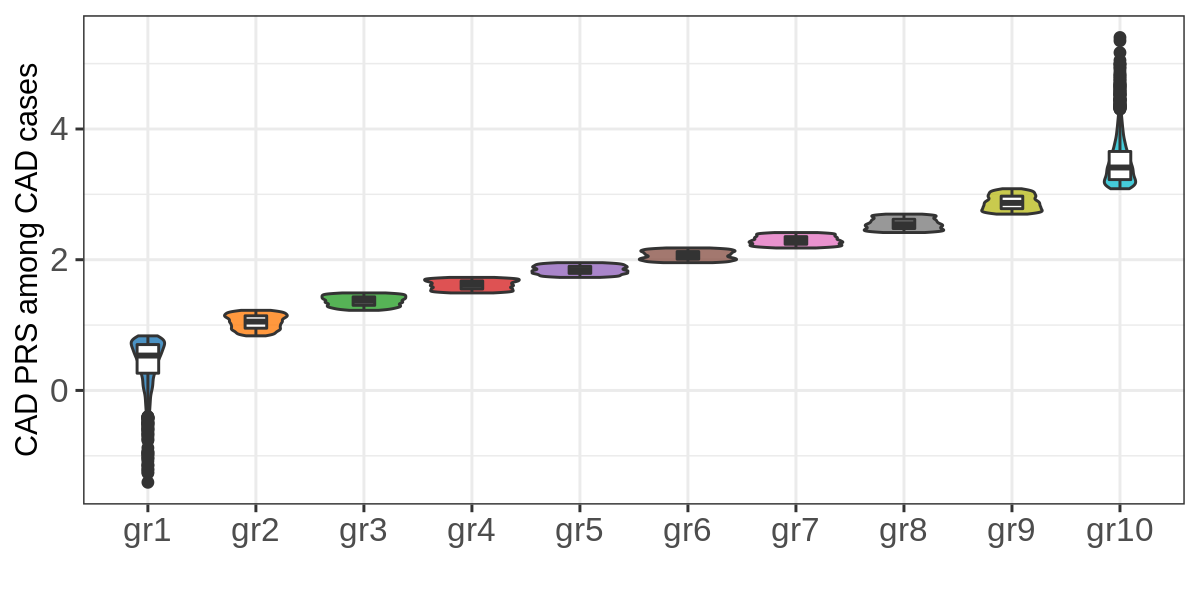

In [4]:
# plot PRS distribution
options(repr.plot.width = 6, repr.plot.height = 3, repr.plot.res = 200)
plot_PRS_dist_PRS_partition(out_PRSdec, PRS_res, outFold, "PRS deciles clusters", width_pl = 6, height_pl = 3)

 [1] "Apolipoprotein B"                                                                
 [2] "LDL direct"                                                                      
 [3] "Cholesterol"                                                                     
 [4] "Non-accidental death in close genetic family"                                    
 [5] "Apolipoprotein A"                                                                
 [6] "Eosinophill count"                                                               
 [7] "Diagnoses - ICD10\nI20 Angina pectoris"                                          
 [8] "Diagnoses - ICD10\nE78 Disorders of lipoprotein metabolism and other lipidaemias"
 [9] "Eosinophill percentage"                                                          
[10] "Mean sphered cell volume"                                                        


Warning message:
“Removed 16 rows containing missing values (geom_text_repel).”


[1] 0.6538462
[1] 26
[1] 0.6538462
[1] 26


Warning message:
“Removed 16 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


 [1] "Apolipoprotein B"                                                                
 [2] "LDL direct"                                                                      
 [3] "Cholesterol"                                                                     
 [4] "Apolipoprotein A"                                                                
 [5] "Diagnoses - ICD10\nI20 Angina pectoris"                                          
 [6] "Diagnoses - ICD10\nE78 Disorders of lipoprotein metabolism and other lipidaemias"
 [7] "Eosinophill count"                                                               
 [8] "Eosinophill percentage"                                                          
 [9] "Height"                                                                          
[10] "Mean sphered cell volume"                                                        


Warning message:
“Removed 16 rows containing missing values (geom_text_repel).”


[1] 0.9230769
[1] 26
[1] 0.9230769
[1] 26


Warning message:
“Removed 16 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


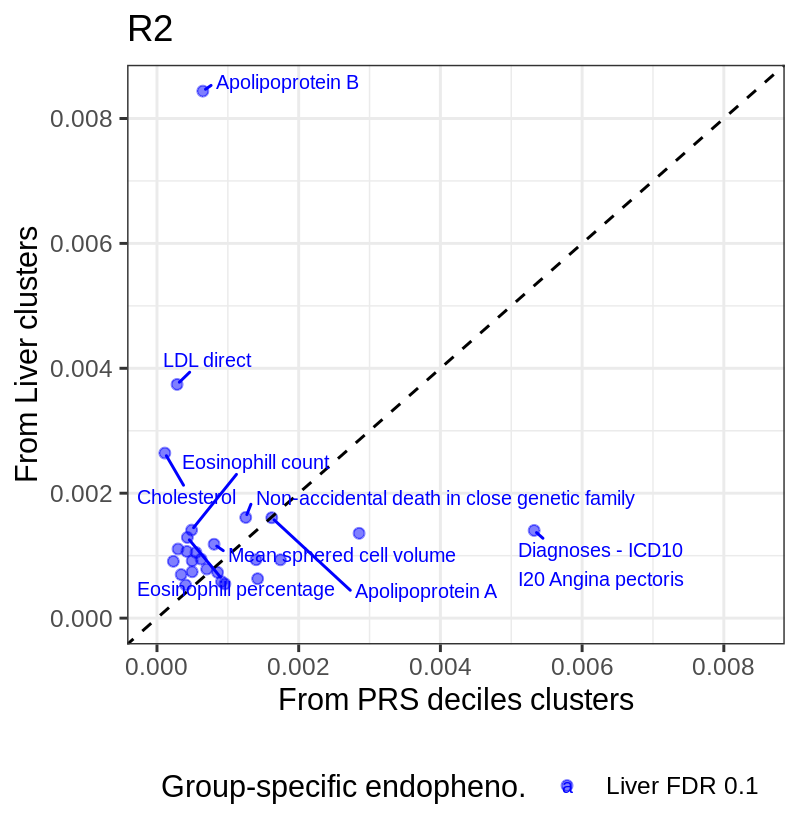

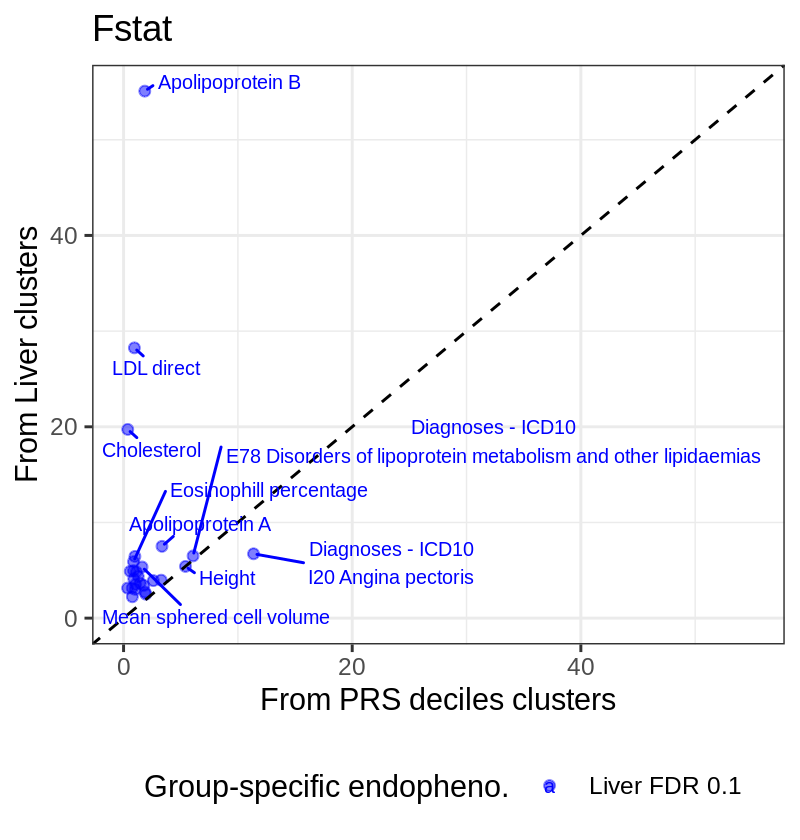

In [38]:
# plot variance explained
options(repr.plot.width = 4, repr.plot.height = 4.2, repr.plot.res = 200)
df <- plot_variance_explained_comparision(endop_tissue,
    endop_PRSdec,
    endop_variance_tissue, 
    endop_variance_PRSdec, 
    "Liver", 
    "PRS deciles clusters", 
    var_name = "R2_group", 
    pval_corr_thr = 0.1, 
    pvalue_thr = 0.001) 

df <- plot_variance_explained_comparision(endop_tissue,
    endop_PRSdec,
    endop_variance_tissue, 
    endop_variance_PRSdec, 
    "Liver", 
    "PRS deciles clusters", 
     var_name = "Fstat_group", 
     pval_corr_thr = 0.1, 
    pvalue_thr = 0.001) 


In [6]:
res = endop_variance_PRSdec %>%
    dplyr::mutate(complete_name = case_when(
        !is.na(Coding_meaning) ~ paste(Field, Coding_meaning, sep = "\n"),
        TRUE ~ Field))

,Liver gr1,Liver gr2,Liver gr3,Liver gr4,Liver gr5
PRS deciles1,0.057759828,-0.14938263,0.08402357,-0.009214143,0.21128897
PRS deciles2,0.046848139,-0.10502298,0.10579078,-0.030820608,0.07159757
PRS deciles3,0.105825499,-0.17402822,0.03513322,0.042199757,-0.13251626
PRS deciles4,-0.008852701,-0.02347134,0.03866610,-0.006480486,0.10986891
PRS deciles5,-0.012648334,0.03453464,-0.01837605,0.004055311,-0.06922006
PRS deciles6,-0.033426601,0.02044109,-0.07438599,0.051050710,0.10986891
PRS deciles7,-0.041617901,0.08108205,-0.09205038,0.042199757,-0.08148780
PRS deciles8,0.027189019,0.01835002,-0.07438599,-0.017544178,0.04608334
PRS deciles9,-0.038341381,0.12290341,-0.09558326,-0.002055010,-0.09424491
PRS deciles10,-0.102705285,0.17456256,0.09108561,-0.073349834,-0.17122334


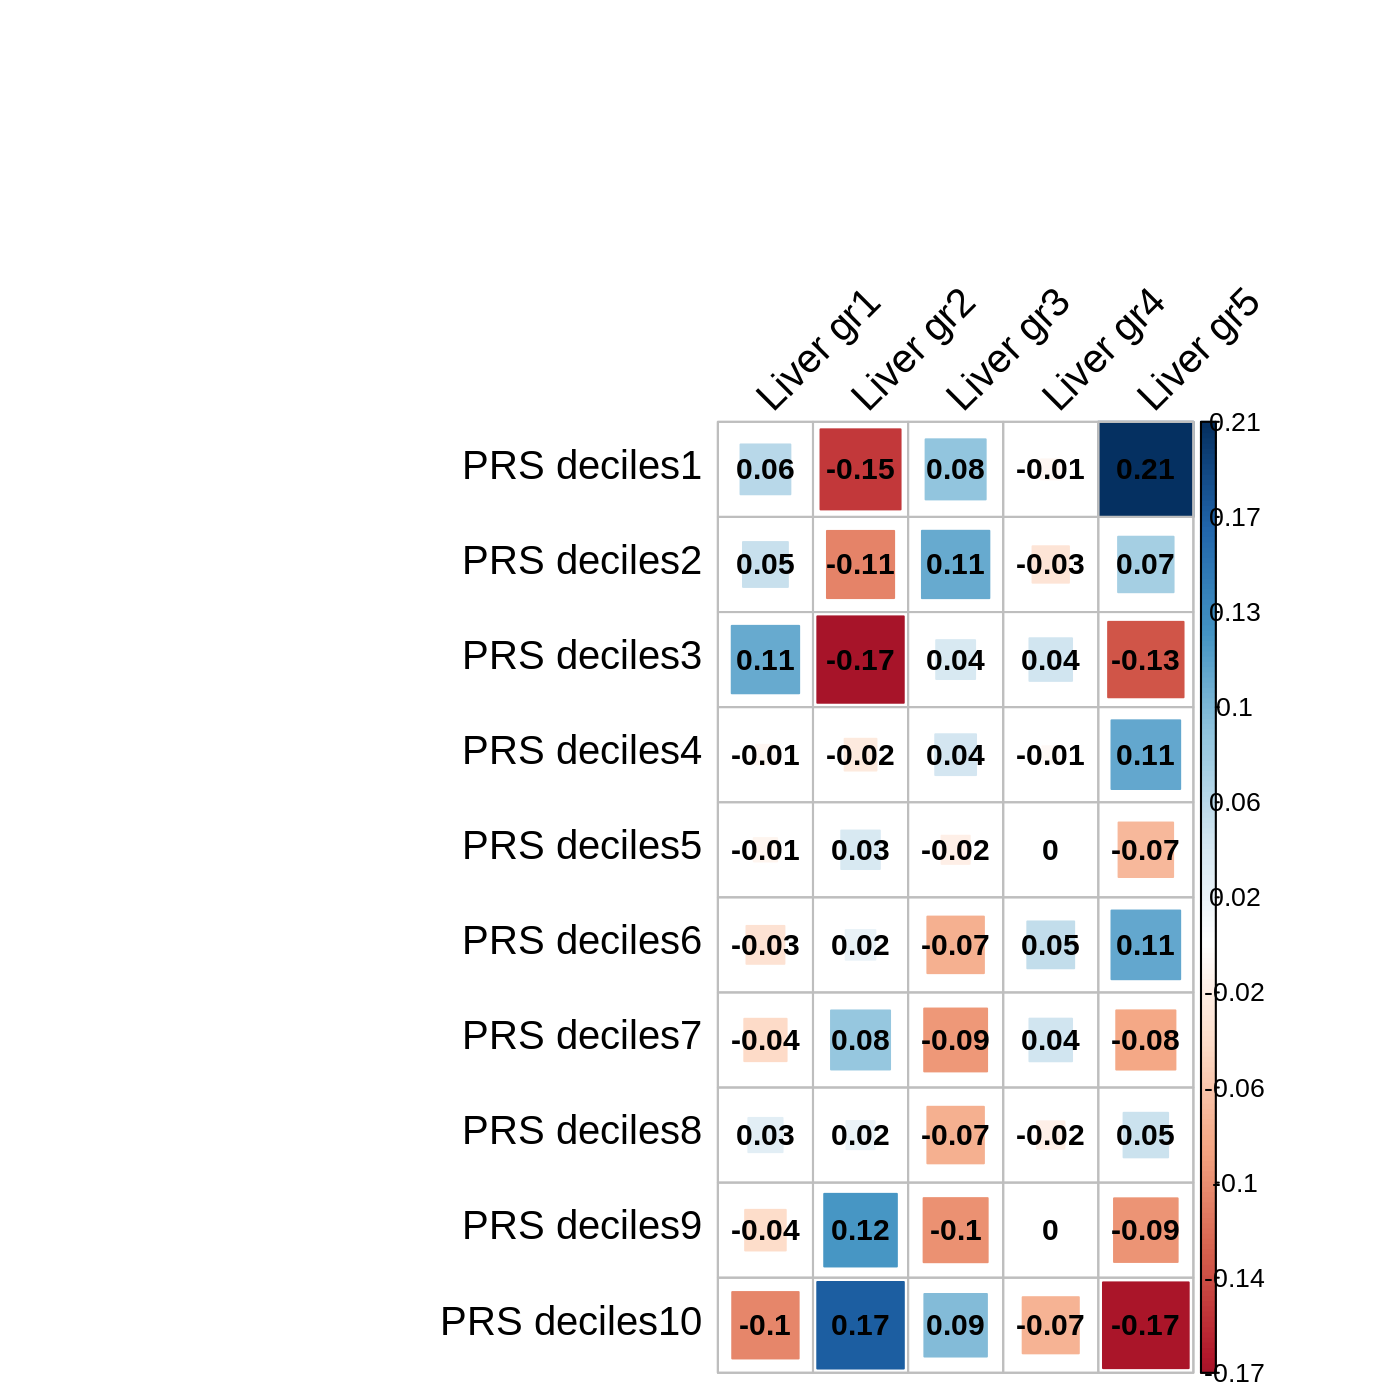

In [7]:
# plot overlap clusters
options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 200)
plot_overlap_clusters(out_PRSdec, out_tissue, 'Liver', 'deciles', outFold = outFold, width_pl = 7, height_pl = 7)

< table of extent 0 >


pheno_id,Field,meaning
<chr>,<chr>,<chr>
30630,Apolipoprotein A,NA
41270_I20,Diagnoses - ICD10,I20 Angina pectoris
12144der,Height,NA
20110_1,Illnesses of mother,Heart disease
41270_E78,Diagnoses - ICD10,E78 Disorders of lipoprotein metabolism and other lipidaemias


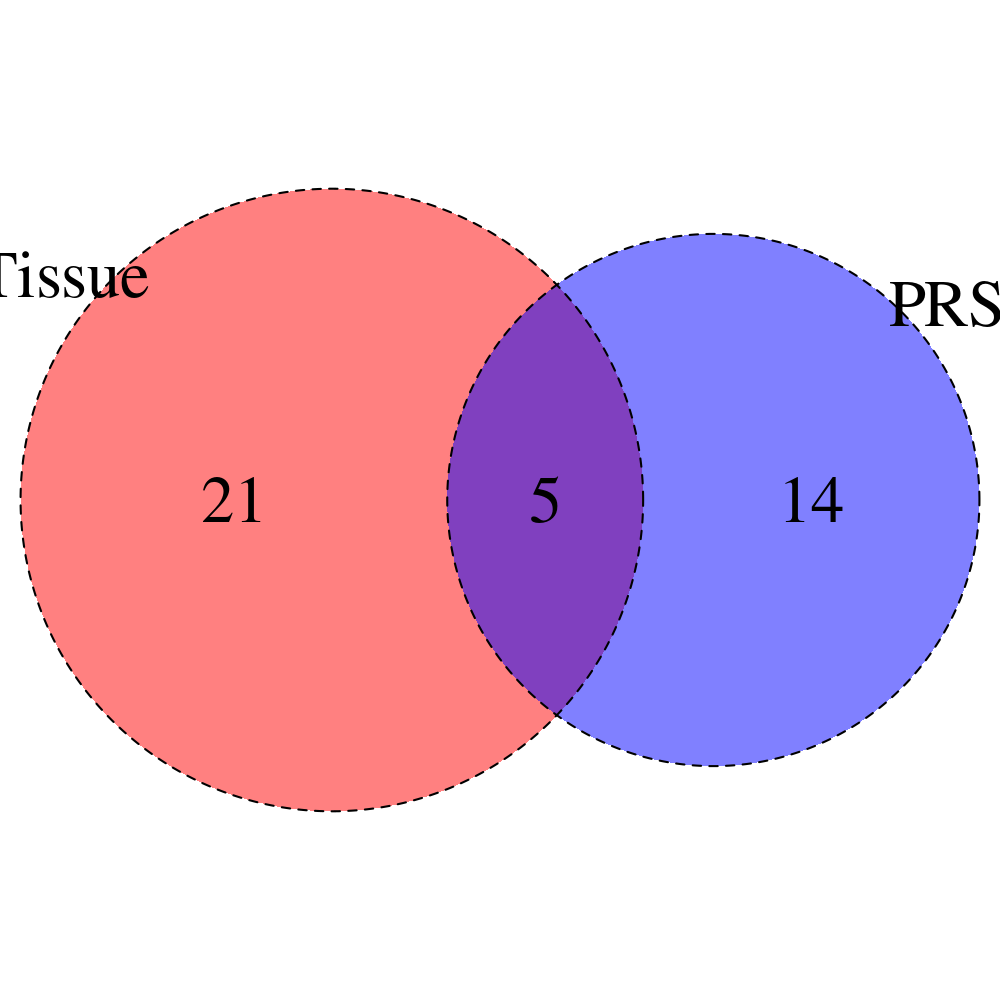

In [9]:
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 200)
# plot endophenotypes
common_endo <- plot_intersection_endop(endop_tissue, endop_PRSdec, outFold, pval_corr_thr = 0.1, 
    name_PRS = 'PRSdeciles', name_tissue = 'Liver', width_pl = 5, height_pl = 5)
common_endo 

Warning message in grep("Illnesses", Field) & !is.na(meaning):
“longer object length is not a multiple of shorter object length”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


[1] 0.6833333


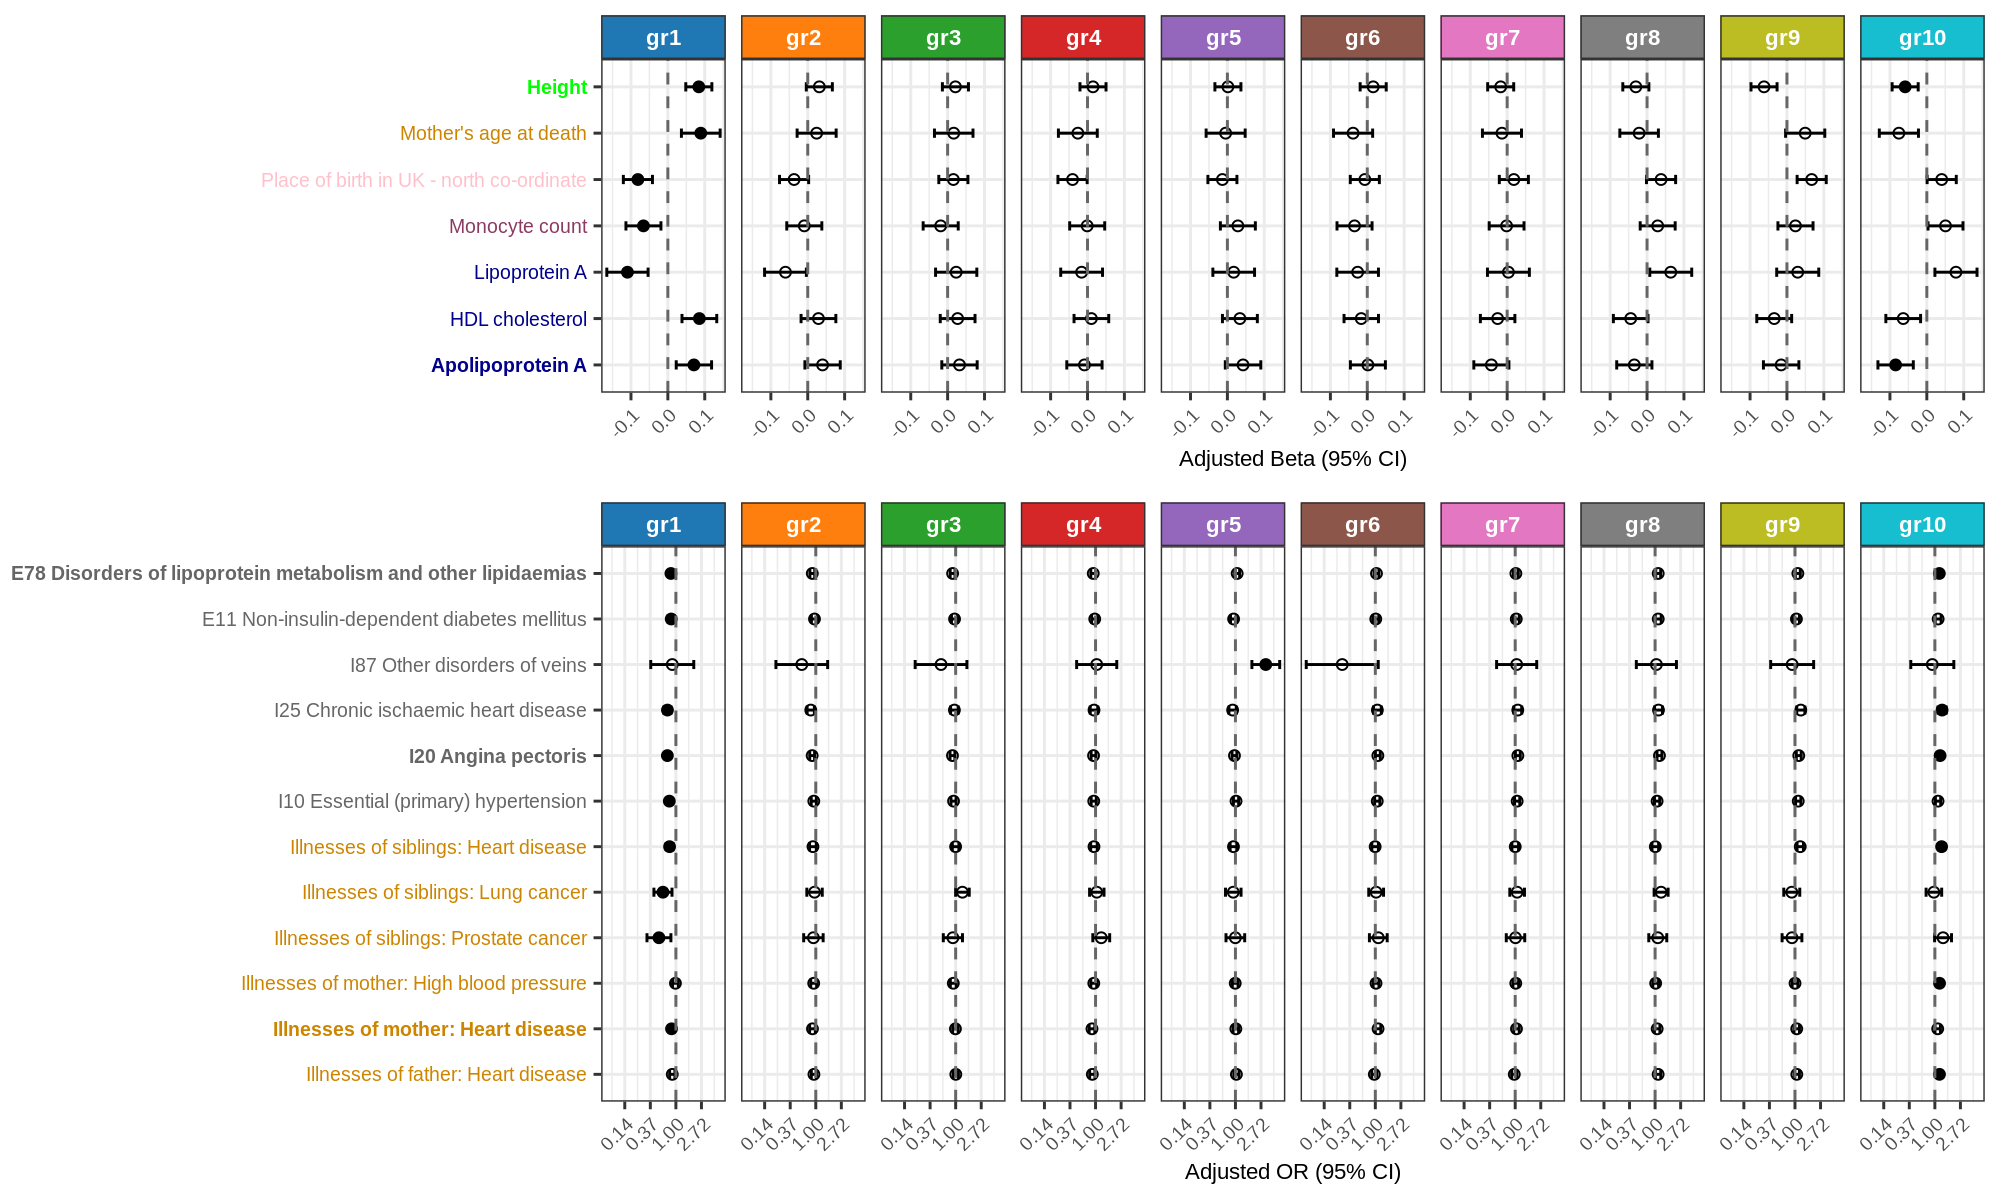

In [48]:
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 200)
# plot endophenotypes
endopheno_forest_plot(
    common_endo = common_endo,
    colorFile, 
    endop_PRSdec, 
    pval_pheno = 0.0001,
    pval_corr_thr = 0.1, 
    outFold = outFold, 
    type_input = 'PRSdeciles', 
    type_cluster = 'Cases')

comp,n,type,gr
<fct>,<dbl>,<chr>,<fct>
gr1_vs_all,22,Liver,gr1
gr2_vs_all,214,Liver,gr2
gr3_vs_all,46,Liver,gr3
gr4_vs_all,214,Liver,gr4
gr5_vs_all,21,Liver,gr5
gr1_vs_all,28,PRS deciles,gr1
gr10_vs_all,5,PRS deciles,gr10
gr9_vs_all,1,PRS deciles,gr9
gr2_vs_all,0,PRS deciles,gr2


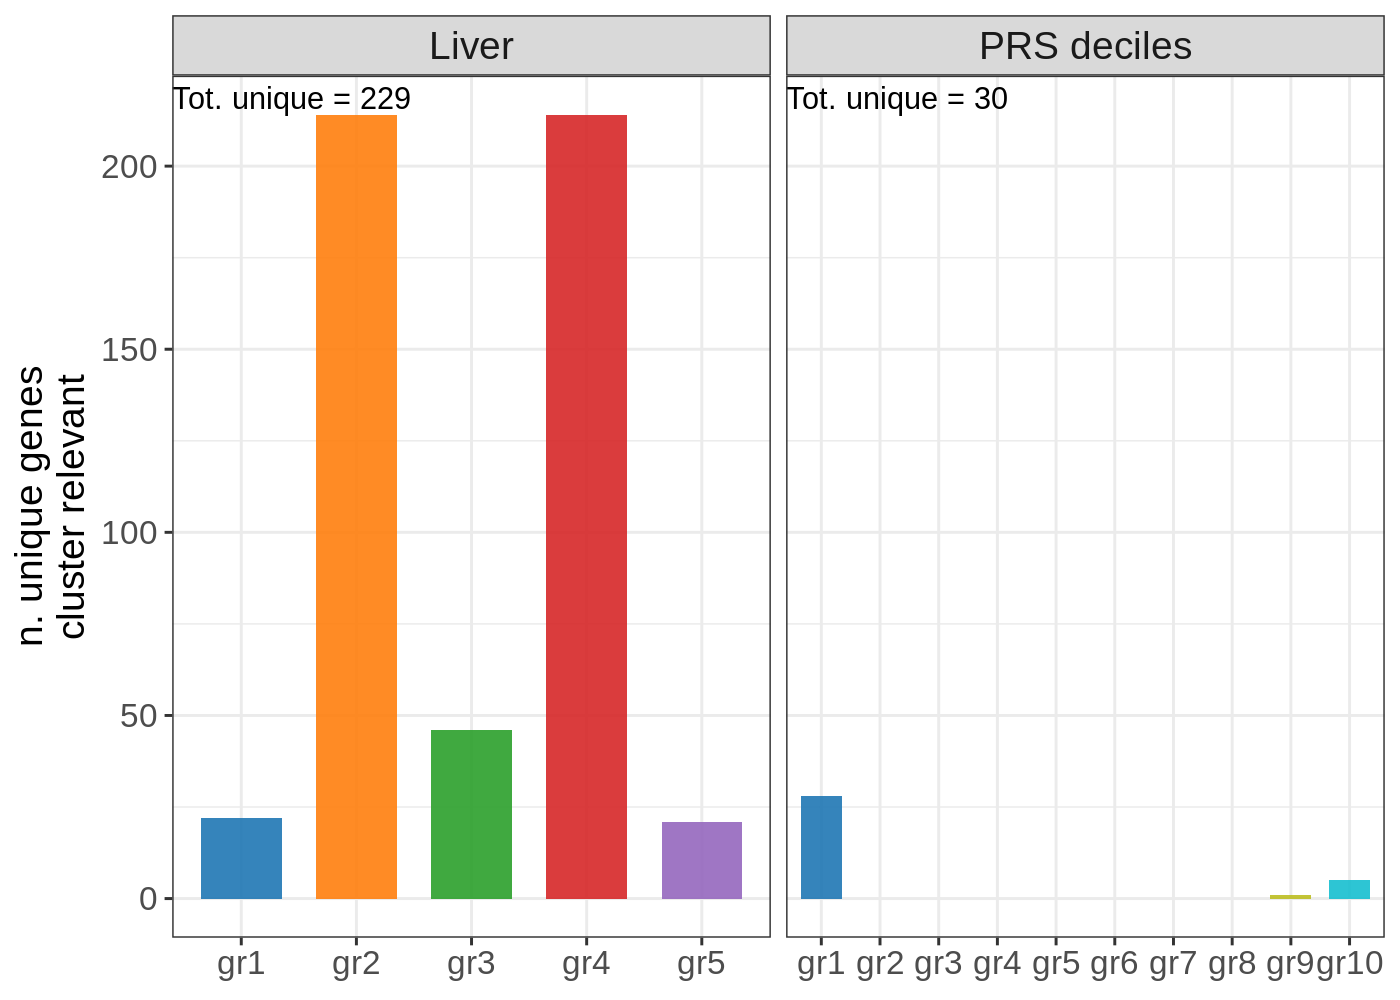

comp,n,type,gr
<fct>,<dbl>,<chr>,<fct>
gr1_vs_all,40,Liver,gr1
gr2_vs_all,263,Liver,gr2
gr3_vs_all,36,Liver,gr3
gr4_vs_all,262,Liver,gr4
gr5_vs_all,40,Liver,gr5
gr1_vs_all,1,PRS deciles,gr1
gr10_vs_all,2,PRS deciles,gr10
gr3_vs_all,1,PRS deciles,gr3
gr4_vs_all,1,PRS deciles,gr4


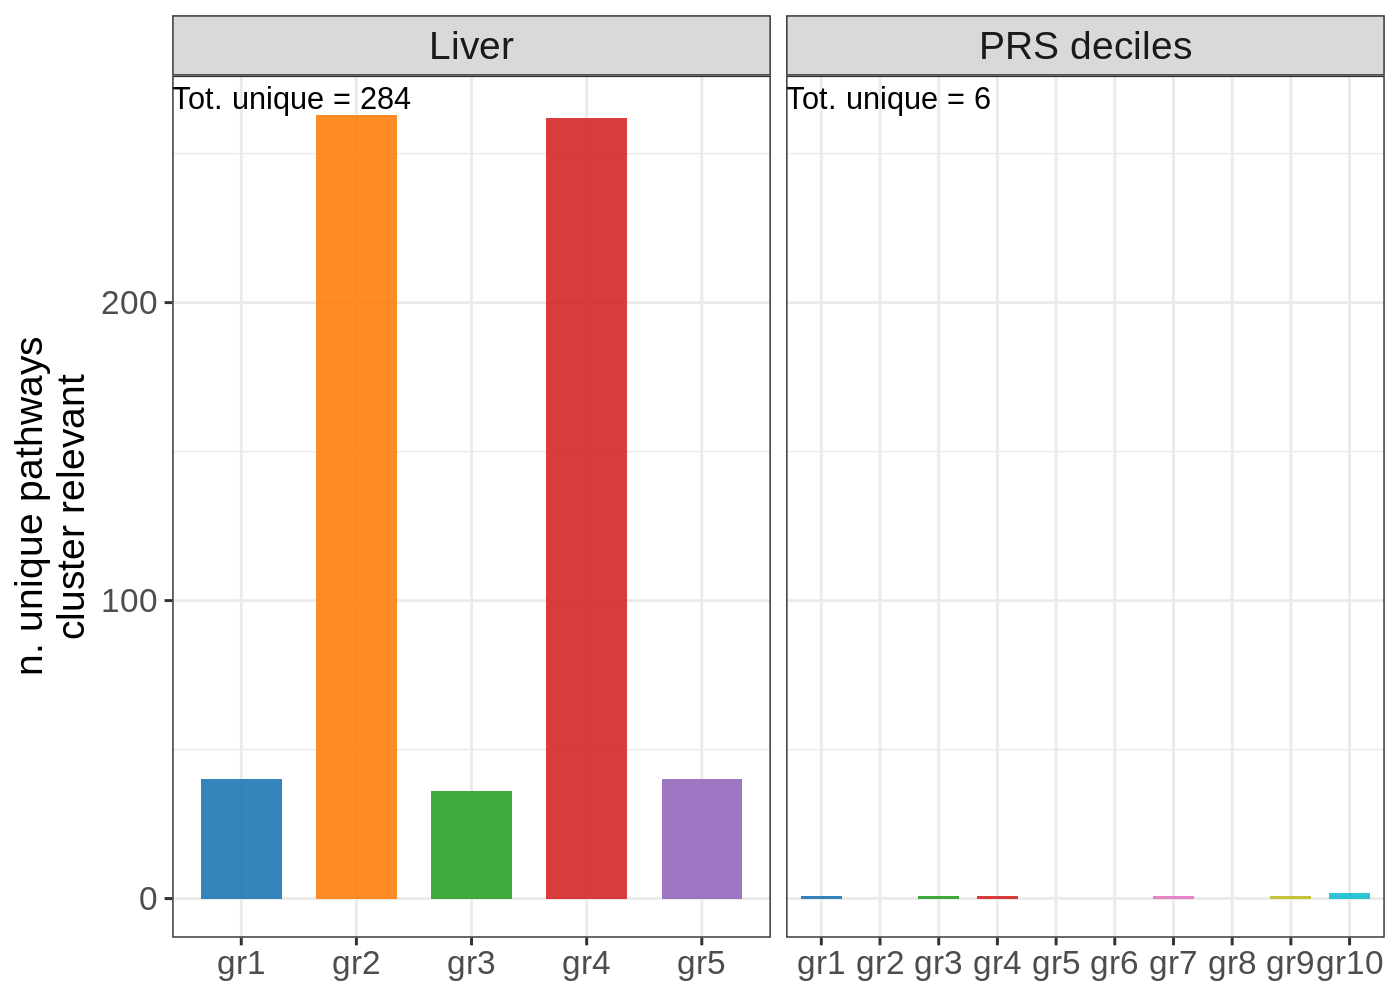

In [11]:
# plot number of genes and pathways associated with clusters
options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res = 200)
out_genes <- plot_nsign_features(gene_tissue, gene_PRSdec, 
                    tissue_name = 'Liver', PRS_name = 'deciles', 
                    type_data = 'genes', width_pl = 7, height_pl = 5, outFold = outFold)
out_genes$count_tot

out_genes <- plot_nsign_features(path_tissue, path_PRSdec, 
                    tissue_name = 'Liver', PRS_name = 'deciles', 
                    type_data = 'pathways', width_pl = 7, height_pl = 5, outFold = outFold)
out_genes$count_tot

## Comparison with PRS quartiles division

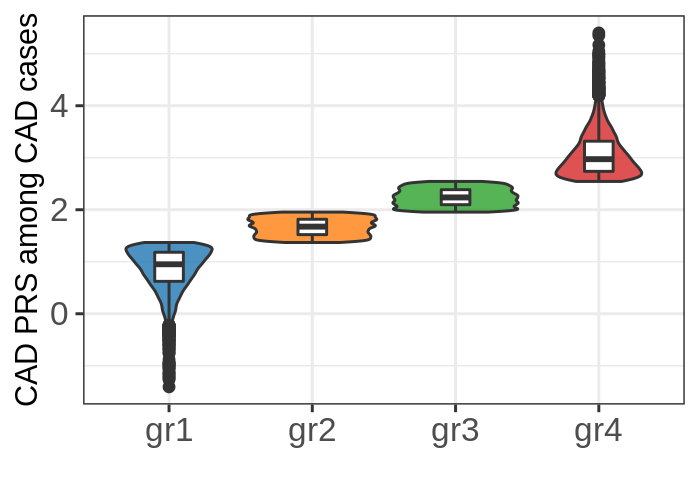

In [12]:
# plot PRS distribution
options(repr.plot.width = 3.5, repr.plot.height = 2.5, repr.plot.res = 200)
plot_PRS_dist_PRS_partition(out_PRSqua, PRS_res, outFold, "PRS quartiles clusters", width_pl = 3.5, height_pl = 2.5)

 [1] "Apolipoprotein B"                                                                
 [2] "LDL direct"                                                                      
 [3] "Cholesterol"                                                                     
 [4] "Non-accidental death in close genetic family"                                    
 [5] "Apolipoprotein A"                                                                
 [6] "Eosinophill count"                                                               
 [7] "Diagnoses - ICD10\nI20 Angina pectoris"                                          
 [8] "Diagnoses - ICD10\nE78 Disorders of lipoprotein metabolism and other lipidaemias"
 [9] "Eosinophill percentage"                                                          
[10] "Mean sphered cell volume"                                                        


Warning message:
“Removed 16 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


[1] 0.8076923
[1] 26
[1] 0.8076923
[1] 26


Warning message:
“Removed 16 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


 [1] "Apolipoprotein B"                                                                
 [2] "LDL direct"                                                                      
 [3] "Cholesterol"                                                                     
 [4] "Apolipoprotein A"                                                                
 [5] "Diagnoses - ICD10\nI20 Angina pectoris"                                          
 [6] "Diagnoses - ICD10\nE78 Disorders of lipoprotein metabolism and other lipidaemias"
 [7] "Eosinophill count"                                                               
 [8] "Eosinophill percentage"                                                          
 [9] "Height"                                                                          
[10] "Mean sphered cell volume"                                                        


Warning message:
“Removed 16 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


[1] 0.7307692
[1] 26
[1] 0.7307692
[1] 26


Warning message:
“Removed 16 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


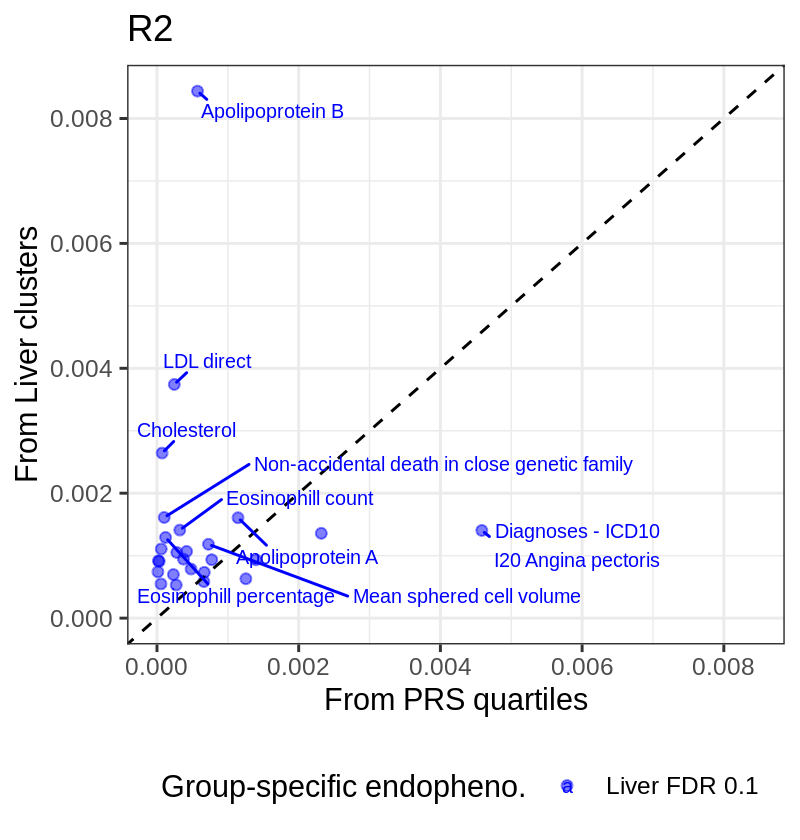

 [1] "Apolipoprotein B"                                                                
 [2] "LDL direct"                                                                      
 [3] "Cholesterol"                                                                     
 [4] "Non-accidental death in close genetic family"                                    
 [5] "Apolipoprotein A"                                                                
 [6] "Eosinophill count"                                                               
 [7] "Diagnoses - ICD10\nI20 Angina pectoris"                                          
 [8] "Diagnoses - ICD10\nE78 Disorders of lipoprotein metabolism and other lipidaemias"
 [9] "Eosinophill percentage"                                                          
[10] "Mean sphered cell volume"                                                        


Warning message:
“Removed 16 rows containing missing values (geom_text_repel).”


[1] 0.8076923
[1] 26
[1] 0.8076923
[1] 26


Warning message:
“Removed 16 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


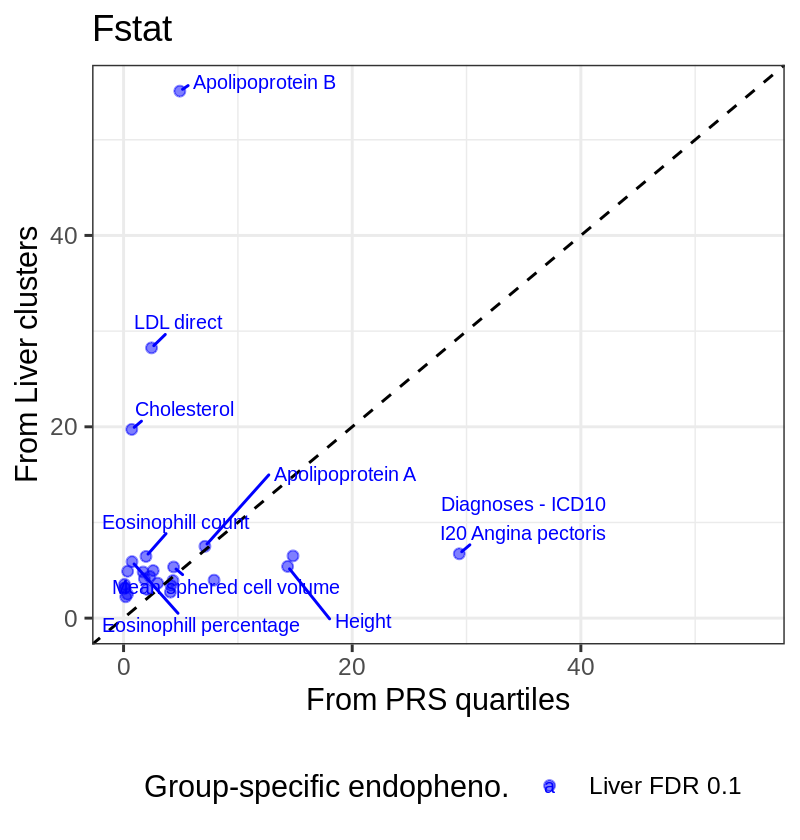

 [1] "Apolipoprotein B"                                                                
 [2] "LDL direct"                                                                      
 [3] "Cholesterol"                                                                     
 [4] "Apolipoprotein A"                                                                
 [5] "Diagnoses - ICD10\nI20 Angina pectoris"                                          
 [6] "Diagnoses - ICD10\nE78 Disorders of lipoprotein metabolism and other lipidaemias"
 [7] "Eosinophill count"                                                               
 [8] "Eosinophill percentage"                                                          
 [9] "Height"                                                                          
[10] "Mean sphered cell volume"                                                        


Warning message:
“Removed 16 rows containing missing values (geom_text_repel).”


[1] 0.5384615
[1] 26
[1] 0.5384615
[1] 26


Warning message:
“Removed 16 rows containing missing values (geom_text_repel).”


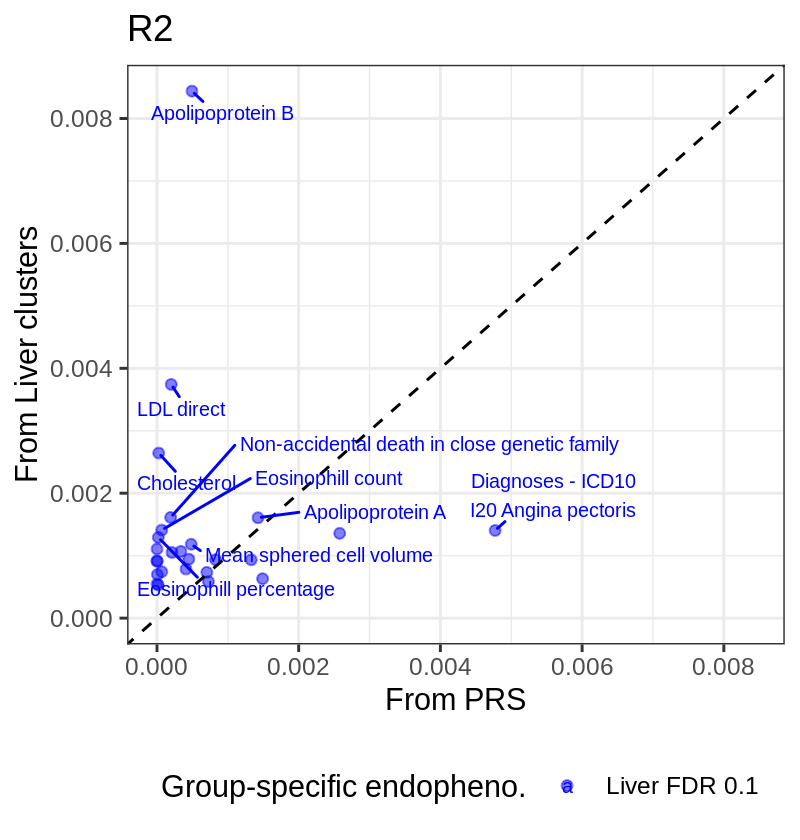

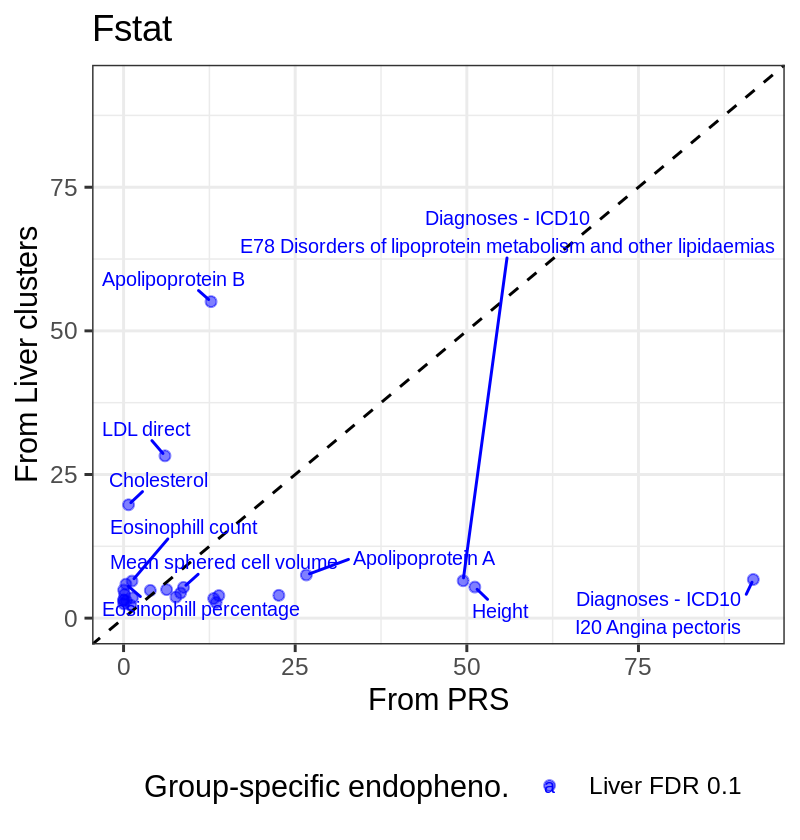

In [42]:
# plot variance explained
options(repr.plot.width = 4, repr.plot.height = 4.2, repr.plot.res = 200)
df_PRSqua <- plot_variance_explained_comparision(endop_tissue,
    endop_PRSqua,
    endop_variance_tissue, 
    endop_variance_PRSqua, 
    "Liver", 
    "PRS quartiles", 
    var_name = "R2_group", 
    pval_corr_thr = 0.1, 
    pvalue_thr = 0.001) 

df <- plot_variance_explained_comparision(endop_tissue,
    endop_PRSqua,
    endop_variance_tissue, 
    endop_variance_PRSqua, 
    "Liver", 
    "PRS quartiles", 
    var_name = "Fstat_group", 
    pval_corr_thr = 0.1, 
     pvalue_thr = 0.001) 

df_PRS <- plot_variance_explained_comparision(endop_tissue,
    endop_PRSqua,
    endop_variance_tissue, 
    endop_variance_PRS, 
    "Liver", 
    "PRS", 
    var_name = "R2_group", 
    pval_corr_thr = 0.1, 
     pvalue_thr = 0.001) 

df <- plot_variance_explained_comparision(endop_tissue,
    endop_PRSqua,
    endop_variance_tissue, 
    endop_variance_PRS, 
    "Liver", 
    "PRS", 
    var_name = "Fstat_group", 
    pval_corr_thr = 0.1,  
    pvalue_thr = 0.001) 

,Liver gr1,Liver gr2,Liver gr3,Liver gr4,Liver gr5
PRS quartiles1,0.071196761,-0.13029870,0.04833769,-0.002707293,0.081575797
PRS quartiles2,0.004369807,-0.03663856,0.04975054,0.002602163,-0.005154338
PRS quartiles3,-0.020975825,0.04135176,-0.07721230,0.025825493,0.040980493
PRS quartiles4,-0.054595153,0.12559419,-0.02089216,-0.025714933,-0.117393336


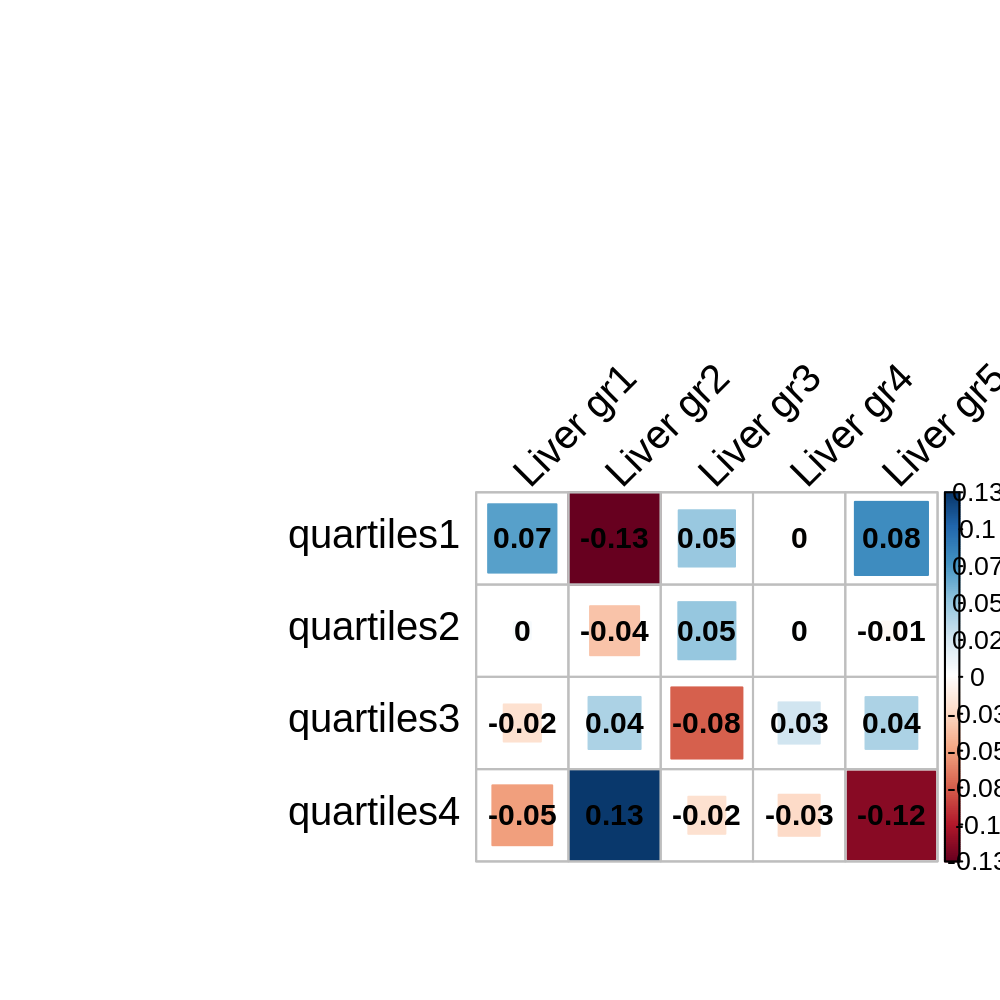

In [14]:
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 200)
# plot NMI
plot_overlap_clusters(out_PRSqua, out_tissue, 'Liver', 'quartiles', outFold = outFold, width_pl = 5, height_pl = 5)


< table of extent 0 >


pheno_id,Field,meaning
<chr>,<chr>,<chr>
30630,Apolipoprotein A,NA
30640,Apolipoprotein B,NA
30120,Lymphocyte count,NA
30240,Reticulocyte percentage,NA
30250,Reticulocyte count,NA
30710,C-reactive protein,NA
41270_I20,Diagnoses - ICD10,I20 Angina pectoris
12144der,Height,NA
20110_1,Illnesses of mother,Heart disease


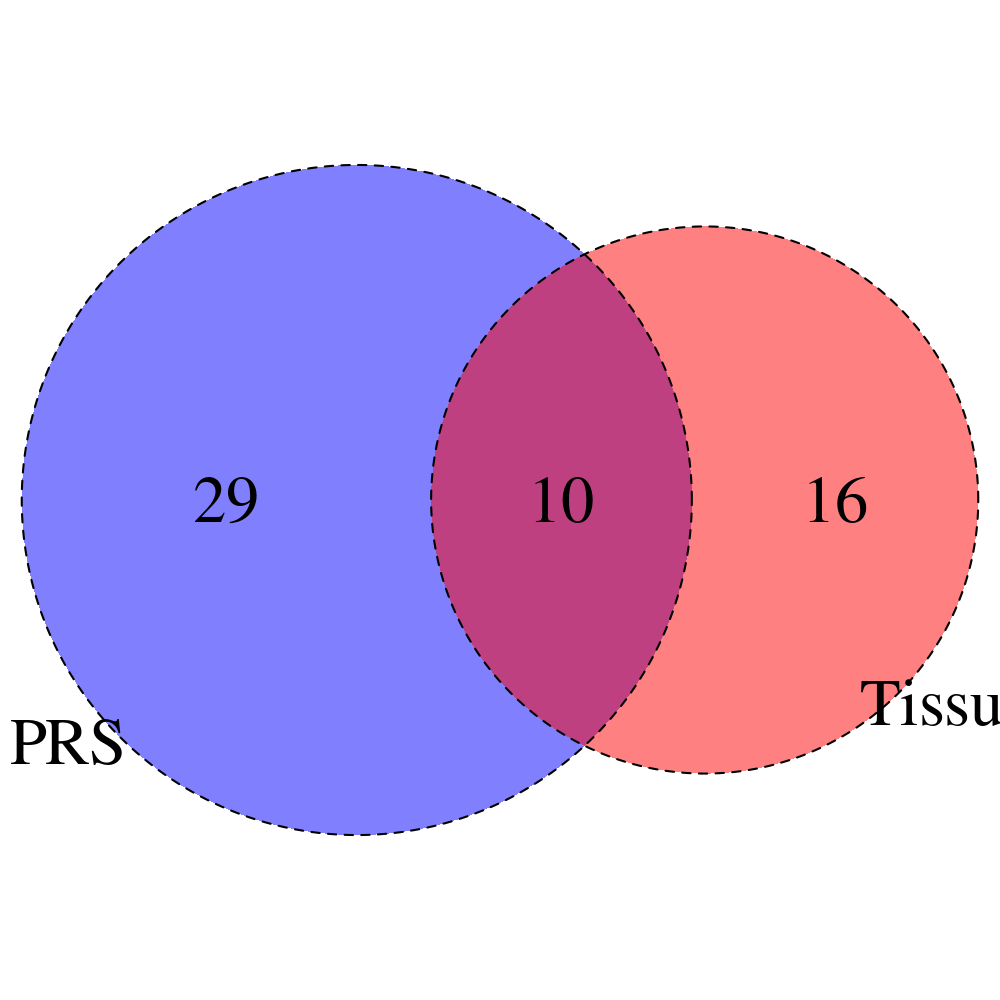

In [16]:
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 200)
# plot intersection endophenotypes
common_endo <- plot_intersection_endop(endop_tissue, endop_PRSqua, outFold, pval_corr_thr = 0.1, name_PRS = 'PRSquartiles', name_tissue = 'Liver', width_pl = 5, height_pl = 5)
common_endo 

Warning message in grep("Illnesses", Field) & !is.na(meaning):
“longer object length is not a multiple of shorter object length”


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


[1] 0.9571429


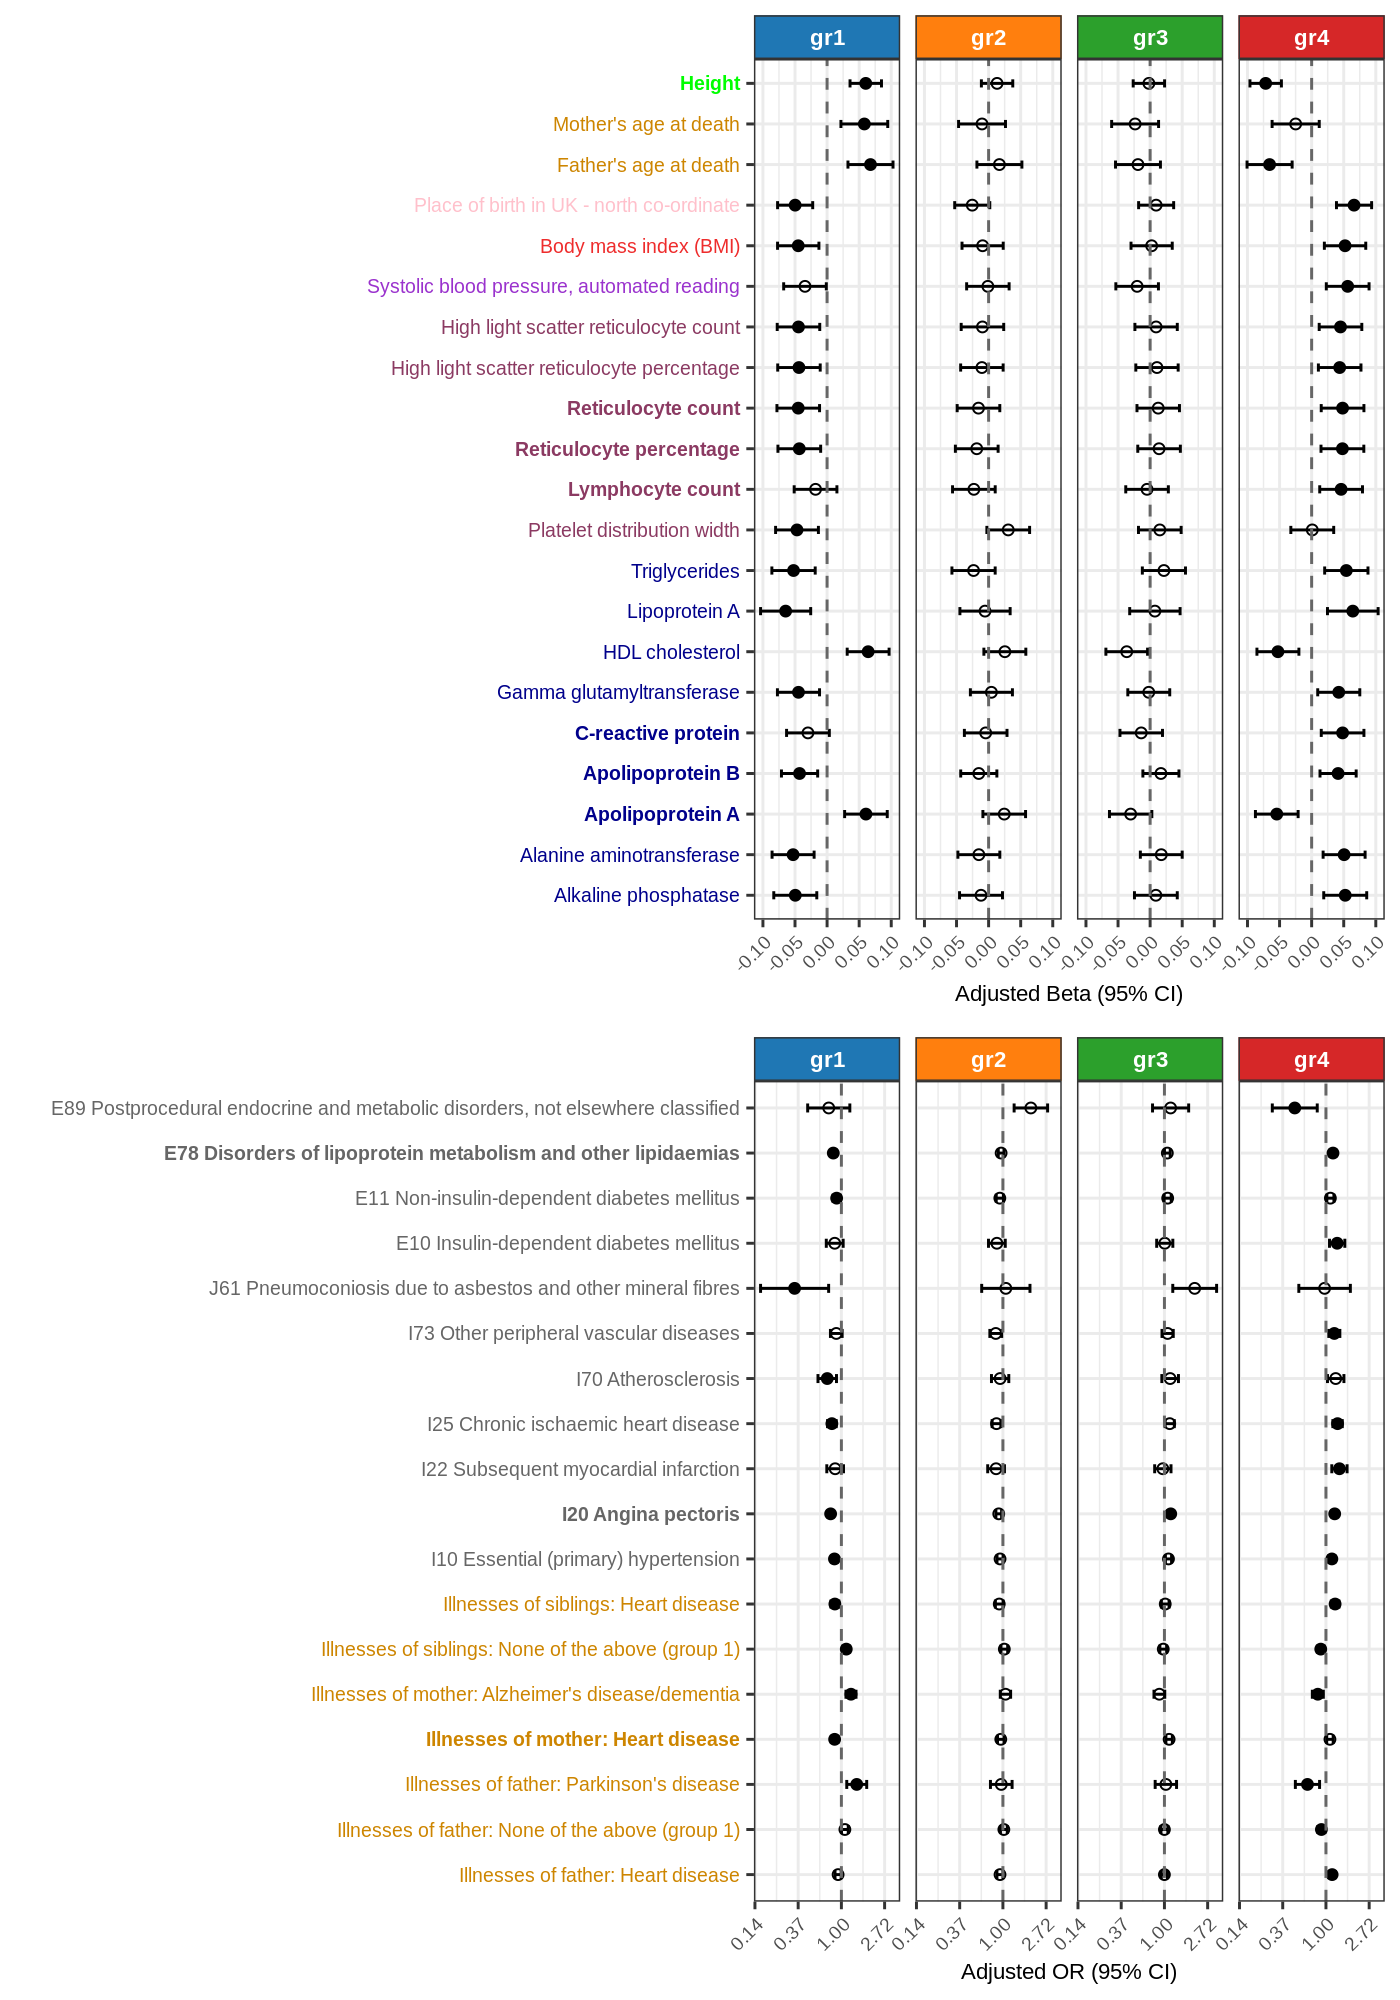

: 

In [49]:
options(repr.plot.width = 7, repr.plot.height = 10, repr.plot.res = 200)
# plot endophenotypes
endopheno_forest_plot(
    common_endo = common_endo,
    colorFile, 
    endop_PRSqua, 
    pval_pheno = 0.0001,
    pval_corr_thr = 0.1,  
    outFold = outFold, 
    type_input = 'PRSquartiles', 
    type_cluster = 'Cases')


comp,n,type,gr
<fct>,<dbl>,<chr>,<fct>
gr1_vs_all,22,Liver,gr1
gr2_vs_all,214,Liver,gr2
gr3_vs_all,46,Liver,gr3
gr4_vs_all,214,Liver,gr4
gr5_vs_all,21,Liver,gr5
gr1_vs_all,58,PRS quartiles,gr1
gr4_vs_all,50,PRS quartiles,gr4
gr2_vs_all,0,PRS quartiles,gr2
gr3_vs_all,0,PRS quartiles,gr3


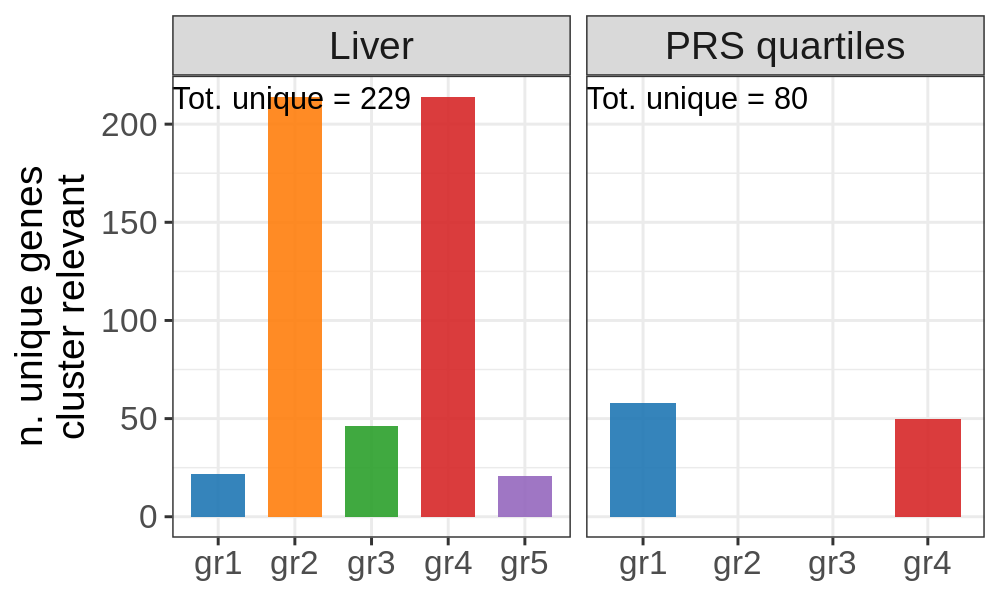

comp,n,type,gr
<fct>,<dbl>,<chr>,<fct>
gr1_vs_all,40,Liver,gr1
gr2_vs_all,263,Liver,gr2
gr3_vs_all,36,Liver,gr3
gr4_vs_all,262,Liver,gr4
gr5_vs_all,40,Liver,gr5
gr1_vs_all,2,PRS quartiles,gr1
gr4_vs_all,3,PRS quartiles,gr4
gr2_vs_all,0,PRS quartiles,gr2
gr3_vs_all,0,PRS quartiles,gr3


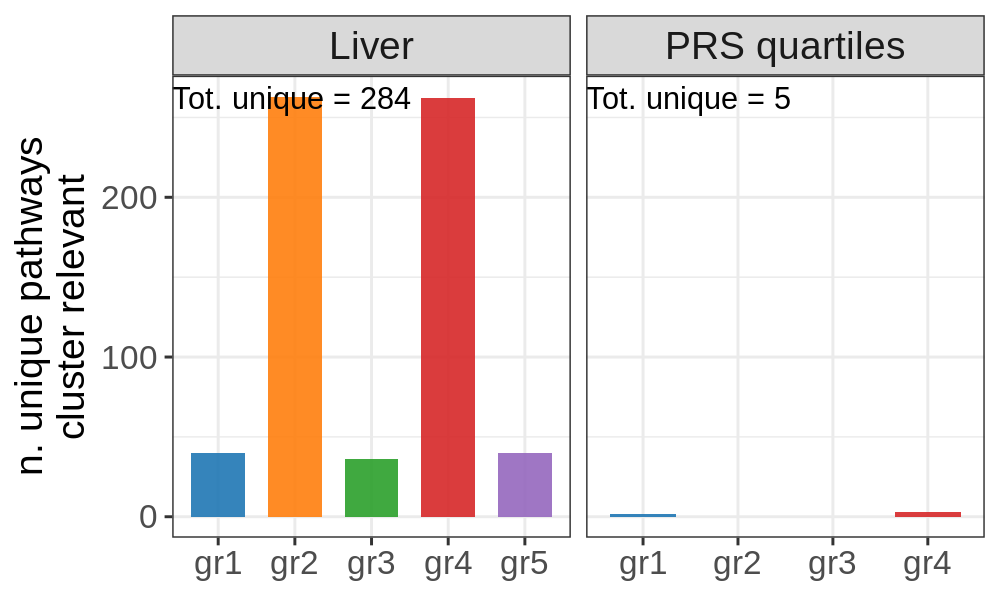

In [19]:
# plot number of genes and pathways associated with clusters
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 200)
out_genes <- plot_nsign_features(gene_tissue, gene_PRSqua, 
                    tissue_name = 'Liver', PRS_name = 'quartiles', 
                    type_data = 'genes', width_pl = 5, height_pl = 3, outFold = outFold)
out_genes$count_tot

out_genes <- plot_nsign_features(path_tissue, path_PRSqua, 
                    tissue_name = 'Liver', PRS_name = 'quartiles', 
                    type_data = 'pathways', width_pl = 5, height_pl = 3, outFold = outFold)
out_genes$count_tot

#### Conclusion (quartiles):
- The overlap between PRS quartile and liver cluster is minimal (NMI = 0.0013), but still significant (chisq = 3.8e-10). Indeed we observe an enrichment of PRS quartile 4 in cluster 2 and an enrichment of PRS quartile 1 in cluster 5. Consistent with what observed from the PRS cluster distribution (violin plot in Fig. 2)
- The endophenotypes significant (26 FDR 0.1) in liver have a better variance explained from the cluter from liver than PRS for the majority of those (81%). This is also true when comparing the variance explaiedn by liver cluster and PRS score (still 81%)
- In general, there are 26 cluster significant results of which 10 in common with liver cluster results. Importantly, they are significant only in gr1 and gr4, the more extreme groups.
- As regards, genes and pathways cluster-specific, the numbers are decreased in PRS groupings. For genes 229 vs 80 unique results and 284 vs 5 in pathways. This means that there is no emergence of pathways disruption and in general way lower vairaiblity in genes. Again, the only differences are observed in gr1 and gr4, the more extreme groups.